# HEALTHCARE - INSURANCE COST PREDICTION-REGRESSION ANALYSIS PROJECT

## Importing relevant libraries

In [291]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge

In [292]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.22.3
Pandas Version 1.3.4
Seaborn Version 0.11.2
Matplotlib Version 3.4.3


In [293]:
sns.set()
sns.set_palette(palette='deep')

## Loading Data

In [294]:
healthcare=pd.read_csv('Data.csv',index_col=0)
pd.options.display.max_columns=None
healthcare.head()

years_of_insurance_with_us  regular_checkup_lasy_year  \
applicant_id                                                          
5000                                   3                          1   
5001                                   0                          0   
5002                                   1                          0   
5003                                   7                          4   
5004                                   3                          1   

              adventure_sports Occupation  visited_doctor_last_1_year  \
applicant_id                                                            
5000                         1    Salried                           2   
5001                         0    Student                           4   
5002                         0   Business                           4   
5003                         0   Business                           2   
5004                         0    Student                           2   

             cholesterol_level  daily_avg_steps  age  heart_decs_history  \
applicant_id                                                               
5000                125 to 150             4866   28                   1   
5001                150 to 175             6411   50                   0   
5002                200 to 225             4509   68                   0   
5003                175 to 200             6214   51                   0   
5004                150 to 175             4938   44                   0   

              other_major_decs_history  Gender  avg_glucose_level   bmi  \
applicant_id                                                              
5000                                 0    Male                 97  31.2   
5001                                 0    Male                212  34.2   
5002                                 0  Female                166  40.4   
5003                                 0  Female                109  22.9   
5004                                 1    Male                118  26.5   

               smoking_status  Year_last_admitted   Location  weight  \
applicant_id                                                           
5000                  Unknown                 NaN    Chennai      67   
5001          formerly smoked                 NaN     Jaipur      58   
5002          formerly smoked                 NaN     Jaipur      73   
5003                  Unknown                 NaN    Chennai      71   
5004             never smoked              2004.0  Bangalore      74   

             covered_by_any_other_company Alcohol  exercise  \
applicant_id                                                  
5000                                    N    Rare  Moderate   
5001                                    N    Rare  Moderate   
5002                                    N   Daily   Extreme   
5003                                    Y    Rare        No   
5004                                    N      No   Extreme   

              weight_change_in_last_one_year  fat_percentage  insurance_cost  
applicant_id                                                                  
5000                                       1              25           20978  
5001                                       3              27            6170  
5002                                       0              32           28382  
5003                                       3              37           27148  
5004                                       0              34           29616

In [295]:
healthcare.tail()

years_of_insurance_with_us  regular_checkup_lasy_year  \
applicant_id                                                          
29995                                  3                          0   
29996                                  6                          0   
29997                                  7                          0   
29998                                  1                          0   
29999                                  8                          2   

              adventure_sports Occupation  visited_doctor_last_1_year  \
applicant_id                                                            
29995                        0    Salried                           4   
29996                        0   Business                           4   
29997                        1    Student                           2   
29998                        0    Salried                           2   
29999                        0   Business                           4   

             cholesterol_level  daily_avg_steps  age  heart_decs_history  \
applicant_id                                                               
29995               225 to 250             5614   22                   0   
29996               200 to 225             4719   58                   0   
29997               150 to 175             5624   34                   0   
29998               225 to 250            10777   27                   0   
29999               150 to 175             5882   22                   1   

              other_major_decs_history Gender  avg_glucose_level   bmi  \
applicant_id                                                             
29995                                0   Male                145  36.1   
29996                                0   Male                134  31.3   
29997                                1   Male                151   NaN   
29998                                0   Male                 66  26.6   
29999                                0   Male                245  41.6   

               smoking_status  Year_last_admitted     Location  weight  \
applicant_id                                                             
29995                  smokes              2000.0       Kanpur      79   
29996            never smoked              2009.0       Kanpur      66   
29997                 Unknown                 NaN  Bhubaneswar      76   
29998                 Unknown                 NaN        Surat      74   
29999         formerly smoked              2014.0      Chennai      57   

             covered_by_any_other_company Alcohol  exercise  \
applicant_id                                                  
29995                                   Y    Rare  Moderate   
29996                                   N    Rare  Moderate   
29997                                   N    Rare  Moderate   
29998                                   N    Rare  Moderate   
29999                                   N      No        No   

              weight_change_in_last_one_year  fat_percentage  insurance_cost  
applicant_id                                                                  
29995                                      4              40           39488  
29996                                      2              28           14808  
29997                                      1              35           33318  
29998                                      0              40           30850  
29999                                      4              21            6170

In [296]:
# from pandas_profiling import ProfileReport
# profile=ProfileReport(healthcare, explorative=True)
# profile.to_file("output.html")

## Gaining information from data

In [297]:
print("no. of rows: ",healthcare.shape[0], "\n""no. of columns: ",healthcare.shape[1])

no. of rows:  25000 
no. of columns:  23


In [298]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 5000 to 29999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_lasy_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  int64  
 3   Occupation                      25000 non-null  object 
 4   visited_doctor_last_1_year      25000 non-null  int64  
 5   cholesterol_level               25000 non-null  object 
 6   daily_avg_steps                 25000 non-null  int64  
 7   age                             25000 non-null  int64  
 8   heart_decs_history              25000 non-null  int64  
 9   other_major_decs_history        25000 non-null  int64  
 10  Gender                          25000 non-null  object 
 11  avg_glucose_level               25000 non-null  int64  
 12  bmi                          

## Data Insight:-
There are 25000 rows and 24columns.

2 columns are Float Type

14 columns are integer type &

8 columns are object type.

## Statistical Insight

In [299]:
healthcare.describe(include='all').T

count unique           top   freq  \
years_of_insurance_with_us      25000.0    NaN           NaN    NaN   
regular_checkup_lasy_year       25000.0    NaN           NaN    NaN   
adventure_sports                25000.0    NaN           NaN    NaN   
Occupation                        25000      3       Student  10169   
visited_doctor_last_1_year      25000.0    NaN           NaN    NaN   
cholesterol_level                 25000      5    150 to 175   8763   
daily_avg_steps                 25000.0    NaN           NaN    NaN   
age                             25000.0    NaN           NaN    NaN   
heart_decs_history              25000.0    NaN           NaN    NaN   
other_major_decs_history        25000.0    NaN           NaN    NaN   
Gender                            25000      2          Male  16422   
avg_glucose_level               25000.0    NaN           NaN    NaN   
bmi                             24010.0    NaN           NaN    NaN   
smoking_status                    25000      4  never smoked   9249   
Year_last_admitted              13119.0    NaN           NaN    NaN   
Location                          25000     15     Bangalore   1742   
weight                          25000.0    NaN           NaN    NaN   
covered_by_any_other_company      25000      2             N  17418   
Alcohol                           25000      3          Rare  13752   
exercise                          25000      3      Moderate  14638   
weight_change_in_last_one_year  25000.0    NaN           NaN    NaN   
fat_percentage                  25000.0    NaN           NaN    NaN   
insurance_cost                  25000.0    NaN           NaN    NaN   

                                       mean           std     min      25%  \
years_of_insurance_with_us          4.08904      2.606612     0.0      2.0   
regular_checkup_lasy_year           0.77368      1.199449     0.0      0.0   
adventure_sports                    0.08172      0.273943     0.0      0.0   
Occupation                              NaN           NaN     NaN      NaN   
visited_doctor_last_1_year           3.1042      1.141663     0.0      2.0   
cholesterol_level                       NaN           NaN     NaN      NaN   
daily_avg_steps                  5215.88932   1053.179748  2034.0   4543.0   
age                                44.91832     16.107492    16.0     31.0   
heart_decs_history                  0.05464      0.227281     0.0      0.0   
other_major_decs_history            0.09816      0.297537     0.0      0.0   
Gender                                  NaN           NaN     NaN      NaN   
avg_glucose_level                    167.53     62.729712    57.0    113.0   
bmi                               31.393328      7.876535    12.3     26.1   
smoking_status                          NaN           NaN     NaN      NaN   
Year_last_admitted              2003.892217      7.581521  1990.0   1997.0   
Location                                NaN           NaN     NaN      NaN   
weight                             71.61048      9.325183    52.0     64.0   
covered_by_any_other_company            NaN           NaN     NaN      NaN   
Alcohol                                 NaN           NaN     NaN      NaN   
exercise                                NaN           NaN     NaN      NaN   
weight_change_in_last_one_year      2.51796      1.690335     0.0      1.0   
fat_percentage                     28.81228      8.632382    11.0     21.0   
insurance_cost                  27147.40768  14323.691832  2468.0  16042.0   

                                    50%      75%      max  
years_of_insurance_with_us          4.0      6.0      8.0  
regular_checkup_lasy_year           0.0      1.0      5.0  
adventure_sports                    0.0      0.0      1.0  
Occupation                          NaN      NaN      NaN  
visited_doctor_last_1_year          3.0      4.0     12.0  
cholesterol_level                   NaN      NaN      NaN  
daily_avg_steps                  508

### Data Insights:
Mean values

Standard Deviation ,

Minimum Values

Maximum Values

There are 25000 rows and 24 features.

There are missing values in 'bmi' and 'year_last_admitted' column.

There are outliers in few columns like bmi, daily_avg_steps, other_major_diseases_history, are showing maximum value quite high, suggesting presence of ourliers. Need to look into these columns.

#### Let's correct some column names

In [300]:
healthcare.rename(columns = {'regular_checkup_lasy_year':'regular_checkup_last_year'}, inplace = True)
healthcare['Occupation']= np.where(healthcare['Occupation']=='Salried', 'Salaried', healthcare['Occupation'])

## Checking For Duplicate Entries

In [301]:
# Are there any duplicates?
dups = healthcare.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
healthcare[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [years_of_insurance_with_us, regular_checkup_last_year, adventure_sports, Occupation, visited_doctor_last_1_year, cholesterol_level, daily_avg_steps, age, heart_decs_history, other_major_decs_history, Gender, avg_glucose_level, bmi, smoking_status, Year_last_admitted, Location, weight, covered_by_any_other_company, Alcohol, exercise, weight_change_in_last_one_year, fat_percentage, insurance_cost]
Index: []

No Duplicate rows in the dataset.

# Checking for NULL Entries

In [302]:
# Calculating the percentage of missing values and count in the dataset
missing_values=pd.DataFrame(healthcare.isna().sum().reset_index())
missing_values.columns=['Features','missing count']
missing_values['%missing']=round(missing_values['missing count']/healthcare.shape[0]*100.00,2)
missing_values

Features  missing count  %missing
0       years_of_insurance_with_us              0      0.00
1        regular_checkup_last_year              0      0.00
2                 adventure_sports              0      0.00
3                       Occupation              0      0.00
4       visited_doctor_last_1_year              0      0.00
5                cholesterol_level              0      0.00
6                  daily_avg_steps              0      0.00
7                              age              0      0.00
8               heart_decs_history              0      0.00
9         other_major_decs_history              0      0.00
10                          Gender              0      0.00
11               avg_glucose_level              0      0.00
12                             bmi            990      3.96
13                  smoking_status              0      0.00
14              Year_last_admitted          11881     47.52
15                        Location              0      0.00
16                          weight              0      0.00
17    covered_by_any_other_company              0      0.00
18                         Alcohol              0      0.00
19                        exercise              0      0.00
20  weight_change_in_last_one_year              0      0.00
21                  fat_percentage              0      0.00
22                  insurance_cost              0      0.00

#### bmi and Year_last_admitted are showing Null values

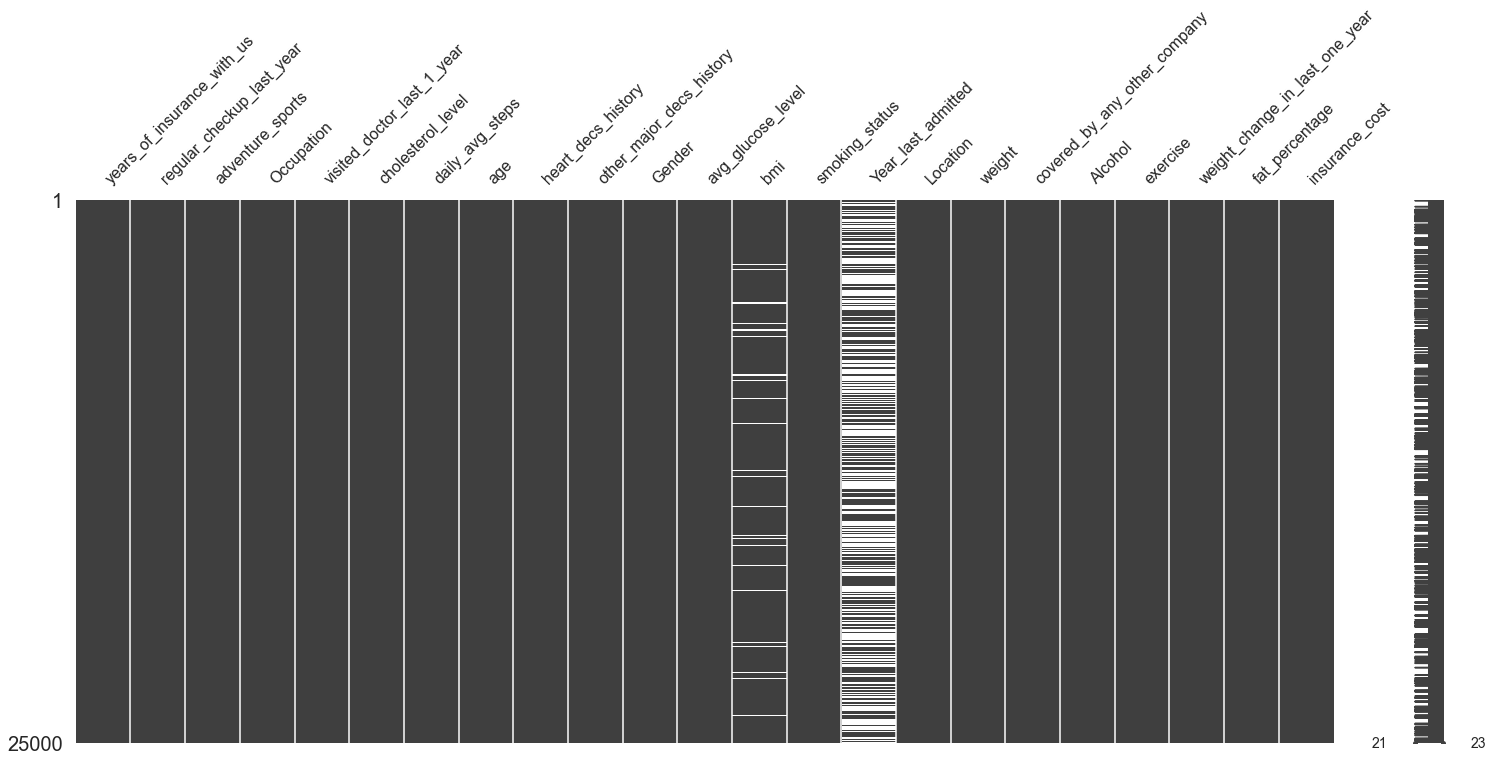

In [303]:
import missingno as mn
mn.matrix(healthcare);

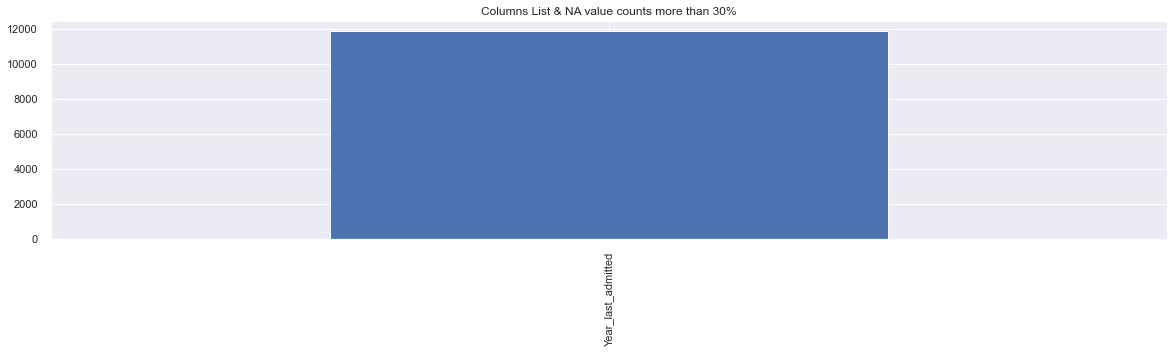

In [304]:
#variable showing Null value more than 30%
NA_col = healthcare.isnull().sum()
NA_col = NA_col[NA_col.values >(0.2*len(healthcare))]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('Columns List & NA value counts more than 30%')
plt.show()

This is the only column whose data is missing more than 30% in the database. As per industry standards we usually drop this kind of columns. In our Interim report we tried making models by imputing this column and after dropping this column. We found that models is slittly better when we are not using this column.
Hence final on final version- we will drop it and do further evaluation and prediction.

In [305]:
healthcare.drop("Year_last_admitted", axis=1, inplace=True)

In [306]:
# Calculating the percentage of missing values and count in the dataset
missing_values=pd.DataFrame(healthcare.isna().sum().reset_index())
missing_values.columns=['Features','missing count']
missing_values['%missing']=round(missing_values['missing count']/healthcare.shape[0]*100.00,2)
missing_values

Features  missing count  %missing
0       years_of_insurance_with_us              0      0.00
1        regular_checkup_last_year              0      0.00
2                 adventure_sports              0      0.00
3                       Occupation              0      0.00
4       visited_doctor_last_1_year              0      0.00
5                cholesterol_level              0      0.00
6                  daily_avg_steps              0      0.00
7                              age              0      0.00
8               heart_decs_history              0      0.00
9         other_major_decs_history              0      0.00
10                          Gender              0      0.00
11               avg_glucose_level              0      0.00
12                             bmi            990      3.96
13                  smoking_status              0      0.00
14                        Location              0      0.00
15                          weight              0      0.00
16    covered_by_any_other_company              0      0.00
17                         Alcohol              0      0.00
18                        exercise              0      0.00
19  weight_change_in_last_one_year              0      0.00
20                  fat_percentage              0      0.00
21                  insurance_cost              0      0.00

## Data Cleaning 

- We will make a seperate column name with height and we will fill its values with the help of bmi and weight.

- once we get the height then we will fill the null values of height with the median value by groupby the 'Gender as the average height of male and female is different.

- once we fill the height null values, then from the height and weight we will impute 'bmi' missing values.

In [307]:
healthcare['height']=''

In [308]:

healthcare['height'] =np.sqrt(healthcare['weight']/healthcare['bmi'])

In [309]:
healthcare.head()

years_of_insurance_with_us  regular_checkup_last_year  \
applicant_id                                                          
5000                                   3                          1   
5001                                   0                          0   
5002                                   1                          0   
5003                                   7                          4   
5004                                   3                          1   

              adventure_sports Occupation  visited_doctor_last_1_year  \
applicant_id                                                            
5000                         1   Salaried                           2   
5001                         0    Student                           4   
5002                         0   Business                           4   
5003                         0   Business                           2   
5004                         0    Student                           2   

             cholesterol_level  daily_avg_steps  age  heart_decs_history  \
applicant_id                                                               
5000                125 to 150             4866   28                   1   
5001                150 to 175             6411   50                   0   
5002                200 to 225             4509   68                   0   
5003                175 to 200             6214   51                   0   
5004                150 to 175             4938   44                   0   

              other_major_decs_history  Gender  avg_glucose_level   bmi  \
applicant_id                                                              
5000                                 0    Male                 97  31.2   
5001                                 0    Male                212  34.2   
5002                                 0  Female                166  40.4   
5003                                 0  Female                109  22.9   
5004                                 1    Male                118  26.5   

               smoking_status   Location  weight covered_by_any_other_company  \
applicant_id                                                                    
5000                  Unknown    Chennai      67                            N   
5001          formerly smoked     Jaipur      58                            N   
5002          formerly smoked     Jaipur      73                            N   
5003                  Unknown    Chennai      71                            Y   
5004             never smoked  Bangalore      74                            N   

             Alcohol  exercise  weight_change_in_last_one_year  \
applicant_id                                                     
5000            Rare  Moderate                               1   
5001            Rare  Moderate                               3   
5002           Daily   Extreme                               0   
5003            Rare        No                               3   
5004              No   Extreme                               0   

              fat_percentage  insurance_cost    height  
applicant_id                                            
5000                      25           20978  1.465413  
5001                      27            6170  1.302270  
5002                      32           28382  1.344221  
5003                      37           27148  1.760806  
5004                      34           29616  1.671063

In [310]:
healthcare.isnull().sum()

years_of_insurance_with_us          0
regular_checkup_last_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
height                            990
dtype: int64

### Let us impute the missing value in bmi 

In [311]:
healthcare.groupby(['Gender'], as_index=False)["height"].median()

Gender    height
0  Female  1.644575
1    Male  1.480872

In [312]:
healthcare['height']=healthcare.groupby(['Gender'])['height'].transform(lambda x: x.fillna(x.median()))

In [313]:
healthcare.isnull().sum()

years_of_insurance_with_us          0
regular_checkup_last_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
height                              0
dtype: int64

In [314]:
healthcare['bmi']=healthcare['weight'] / healthcare['height']**2
#BMI = weight / (height/100)**2

In [315]:
healthcare.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_last_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
height                            0
dtype: int64

### Let us Now do the EDA 

In [316]:
healthcare.head()

years_of_insurance_with_us  regular_checkup_last_year  \
applicant_id                                                          
5000                                   3                          1   
5001                                   0                          0   
5002                                   1                          0   
5003                                   7                          4   
5004                                   3                          1   

              adventure_sports Occupation  visited_doctor_last_1_year  \
applicant_id                                                            
5000                         1   Salaried                           2   
5001                         0    Student                           4   
5002                         0   Business                           4   
5003                         0   Business                           2   
5004                         0    Student                           2   

             cholesterol_level  daily_avg_steps  age  heart_decs_history  \
applicant_id                                                               
5000                125 to 150             4866   28                   1   
5001                150 to 175             6411   50                   0   
5002                200 to 225             4509   68                   0   
5003                175 to 200             6214   51                   0   
5004                150 to 175             4938   44                   0   

              other_major_decs_history  Gender  avg_glucose_level   bmi  \
applicant_id                                                              
5000                                 0    Male                 97  31.2   
5001                                 0    Male                212  34.2   
5002                                 0  Female                166  40.4   
5003                                 0  Female                109  22.9   
5004                                 1    Male                118  26.5   

               smoking_status   Location  weight covered_by_any_other_company  \
applicant_id                                                                    
5000                  Unknown    Chennai      67                            N   
5001          formerly smoked     Jaipur      58                            N   
5002          formerly smoked     Jaipur      73                            N   
5003                  Unknown    Chennai      71                            Y   
5004             never smoked  Bangalore      74                            N   

             Alcohol  exercise  weight_change_in_last_one_year  \
applicant_id                                                     
5000            Rare  Moderate                               1   
5001            Rare  Moderate                               3   
5002           Daily   Extreme                               0   
5003            Rare        No                               3   
5004              No   Extreme                               0   

              fat_percentage  insurance_cost    height  
applicant_id                                            
5000                      25           20978  1.465413  
5001                      27            6170  1.302270  
5002                      32           28382  1.344221  
5003                      37           27148  1.760806  
5004                      34           29616  1.671063

Let's convert categorical columns to object type. Then, we will convert the1 and 0 values into Y and N so that we can do the analysis with othe categorical variables.

In [317]:
healthcare['adventure_sports']= healthcare['adventure_sports'].astype(object)
healthcare['heart_decs_history']= healthcare['heart_decs_history'].astype(object)
healthcare['other_major_decs_history']= healthcare['other_major_decs_history'].astype(object)

In [318]:
healthcare['adventure_sports']= np.where(healthcare['adventure_sports']==1, 'Y',healthcare['adventure_sports'])
healthcare['adventure_sports']= np.where(healthcare['adventure_sports']==0 ,'N',healthcare['adventure_sports'])

In [319]:
healthcare['heart_decs_history']= np.where(healthcare['heart_decs_history']==0, 'N', healthcare['heart_decs_history'])
healthcare['heart_decs_history']= np.where(healthcare['heart_decs_history']==1, 'Y', healthcare['heart_decs_history'])


In [320]:
healthcare['other_major_decs_history']= np.where(healthcare['other_major_decs_history']==0, 'N', healthcare['other_major_decs_history'])
healthcare['other_major_decs_history']= np.where(healthcare['other_major_decs_history']==1, 'Y', healthcare['other_major_decs_history'])


In [321]:
healthcare.head()

years_of_insurance_with_us  regular_checkup_last_year  \
applicant_id                                                          
5000                                   3                          1   
5001                                   0                          0   
5002                                   1                          0   
5003                                   7                          4   
5004                                   3                          1   

             adventure_sports Occupation  visited_doctor_last_1_year  \
applicant_id                                                           
5000                        Y   Salaried                           2   
5001                        N    Student                           4   
5002                        N   Business                           4   
5003                        N   Business                           2   
5004                        N    Student                           2   

             cholesterol_level  daily_avg_steps  age heart_decs_history  \
applicant_id                                                              
5000                125 to 150             4866   28                  Y   
5001                150 to 175             6411   50                  N   
5002                200 to 225             4509   68                  N   
5003                175 to 200             6214   51                  N   
5004                150 to 175             4938   44                  N   

             other_major_decs_history  Gender  avg_glucose_level   bmi  \
applicant_id                                                             
5000                                N    Male                 97  31.2   
5001                                N    Male                212  34.2   
5002                                N  Female                166  40.4   
5003                                N  Female                109  22.9   
5004                                Y    Male                118  26.5   

               smoking_status   Location  weight covered_by_any_other_company  \
applicant_id                                                                    
5000                  Unknown    Chennai      67                            N   
5001          formerly smoked     Jaipur      58                            N   
5002          formerly smoked     Jaipur      73                            N   
5003                  Unknown    Chennai      71                            Y   
5004             never smoked  Bangalore      74                            N   

             Alcohol  exercise  weight_change_in_last_one_year  \
applicant_id                                                     
5000            Rare  Moderate                               1   
5001            Rare  Moderate                               3   
5002           Daily   Extreme                               0   
5003            Rare        No                               3   
5004              No   Extreme                               0   

              fat_percentage  insurance_cost    height  
applicant_id                                            
5000                      25           20978  1.465413  
5001                      27            6170  1.302270  
5002                      32           28382  1.344221  
5003                      37           27148  1.760806  
5004                      34           29616  1.671063

In [322]:
display(healthcare['adventure_sports'].value_counts())
display(healthcare['heart_decs_history'].value_counts())
display(healthcare['other_major_decs_history'].value_counts())

N    22957
Y     2043
Name: adventure_sports, dtype: int64

N    23634
Y     1366
Name: heart_decs_history, dtype: int64

N    22546
Y     2454
Name: other_major_decs_history, dtype: int64

### Let's perform some feature engineering to understand the data better.

In [323]:
#Assigning Age Band to Age column
conditions = [(healthcare['age'] < 36),
             (healthcare['age']>=36) & (healthcare['age']< 46),
            (healthcare['age'] >=46) & (healthcare['age']< 56),
            (healthcare['age'] >=56) & (healthcare['age']< 66)
            ]
choices = ['1','2','3','4']
healthcare['Age_Band'] = np.select(conditions, choices, default = '5')

In [324]:
healthcare['Age_Band'].value_counts()

1    8274
2    4596
4    4468
3    4404
5    3258
Name: Age_Band, dtype: int64

In [325]:
#Assigning categories to Cholesterol_level column
healthcare['cholesterol_level']= np.where(healthcare['cholesterol_level']=='125 to 150', 'very good',healthcare['cholesterol_level'])
healthcare['cholesterol_level']= np.where(healthcare['cholesterol_level']=='150 to 175', 'good',healthcare['cholesterol_level'])
healthcare['cholesterol_level']= np.where(healthcare['cholesterol_level']=='175 to 200', 'Desirable',healthcare['cholesterol_level'])
healthcare['cholesterol_level']= np.where(healthcare['cholesterol_level']=='200 to 225', 'Borderline high',healthcare['cholesterol_level'])
healthcare['cholesterol_level']= np.where(healthcare['cholesterol_level']=='225 to 250', 'high',healthcare['cholesterol_level'])

In [326]:
cat = []

num = []

for i in healthcare.columns:
    if healthcare[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)


print('Categories: ',cat)
print('\n')
print('Numerical: ',num)

Categories:  ['adventure_sports', 'Occupation', 'cholesterol_level', 'heart_decs_history', 'other_major_decs_history', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise', 'Age_Band']


Numerical:  ['years_of_insurance_with_us', 'regular_checkup_last_year', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost', 'height']


--------------------------------------------------------------------------------------------------------------------------

# Univariate Analysis

### Numeric Columns

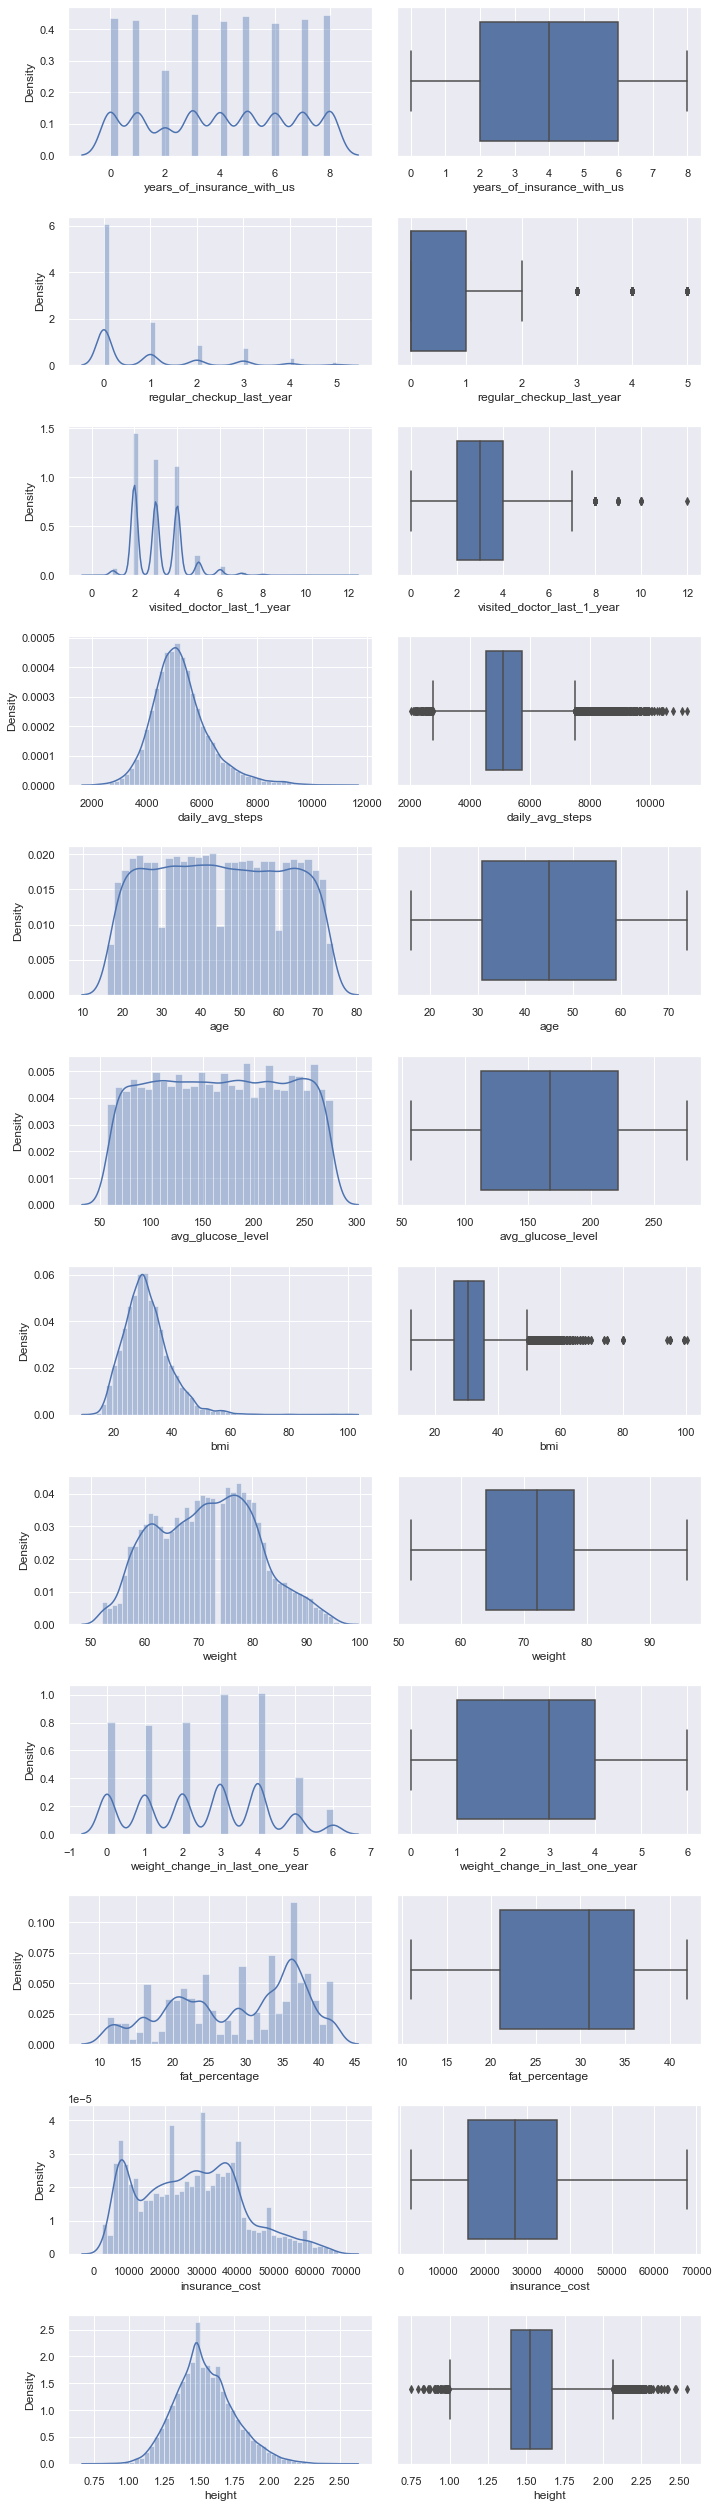

In [327]:
fig, axes = plt.subplots(nrows=12, ncols=2)
fig.set_size_inches(10,35)
j=0
for i in  healthcare.select_dtypes(include= 'number', exclude= 'object').columns:
    a = sns.distplot( healthcare[i],ax=axes[j][0])
    a = sns.boxplot( healthcare[i], orient = "h" , ax=axes[j][1])
    j=j+1
       
fig.tight_layout(w_pad=1.0)
plt.show()

1) daily_avg_steps have outliers. The outlier values doesn't look illogical to achieve but our models are outlier senstitive. Hence we will treat the outliers.

2)The outlier in 'bmi' is looking incorrect entry as so much high bmi is not usually possible. so we will treat the anomaly.

3) We will treat the outliers in height column too.

### Let's have a look at the Outlier percentage in the data

In [328]:
#visualise the percentage of outliers in the dataset
Q1 = healthcare.quantile(0.25)
Q3 = healthcare.quantile(0.75)
IQR = Q3 - Q1
pd.DataFrame((((healthcare < (Q1 - 1.5 * IQR)) | (healthcare > (Q3 + 1.5 * IQR))).sum()/healthcare.shape[0]*100).round(2),columns=['Outliers %'])

Outliers %
Age_Band                              0.00
Alcohol                               0.00
Gender                                0.00
Location                              0.00
Occupation                            0.00
adventure_sports                      0.00
age                                   0.00
avg_glucose_level                     0.00
bmi                                   2.25
cholesterol_level                     0.00
covered_by_any_other_company          0.00
daily_avg_steps                       3.81
exercise                              0.00
fat_percentage                        0.00
heart_decs_history                    0.00
height                                1.57
insurance_cost                        0.00
other_major_decs_history              0.00
regular_checkup_last_year            11.77
smoking_status                        0.00
visited_doctor_last_1_year            0.38
weight                                0.00
weight_change_in_last_one_year        0.00
years_of_insurance_with_us            0.00

In [329]:
pd.DataFrame(data=[healthcare.kurtosis(),healthcare.skew()],index=['Kurtosis','Skewness']).T.round(2)

Kurtosis  Skewness
years_of_insurance_with_us         -1.22     -0.08
regular_checkup_last_year           1.84      1.61
visited_doctor_last_1_year          1.79      0.98
daily_avg_steps                     1.85      0.91
age                                -1.18      0.01
avg_glucose_level                  -1.20     -0.01
bmi                                 3.46      1.06
weight                             -0.64      0.11
weight_change_in_last_one_year     -0.95      0.07
fat_percentage                     -1.06     -0.36
insurance_cost                     -0.50      0.33
height                              0.36      0.41
Age_Band                           -1.27      0.32

# Univariate Analysis- categorical variables.

 categories present in adventure_sports-


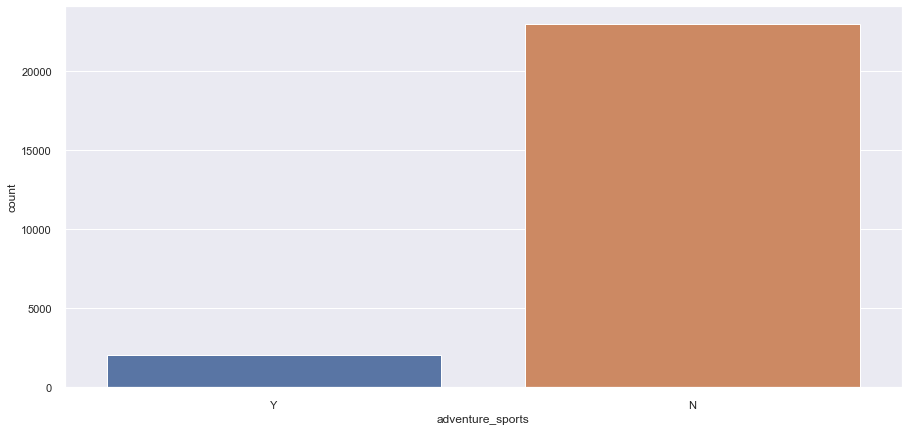

 categories present in Occupation-


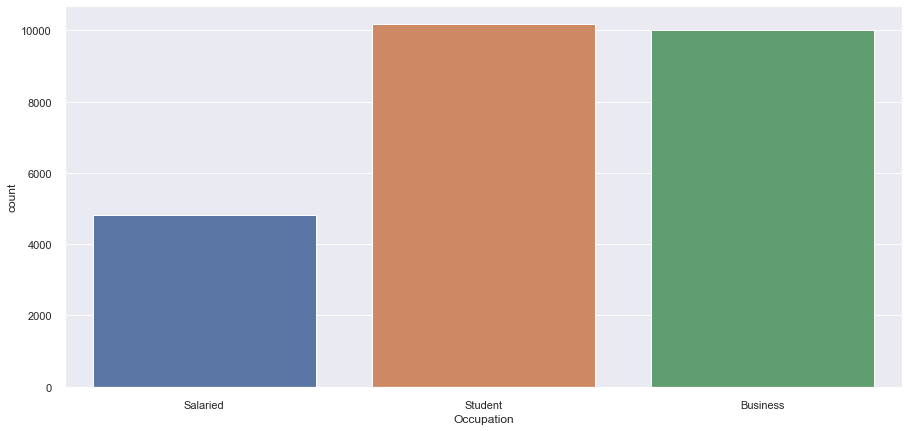

 categories present in cholesterol_level-


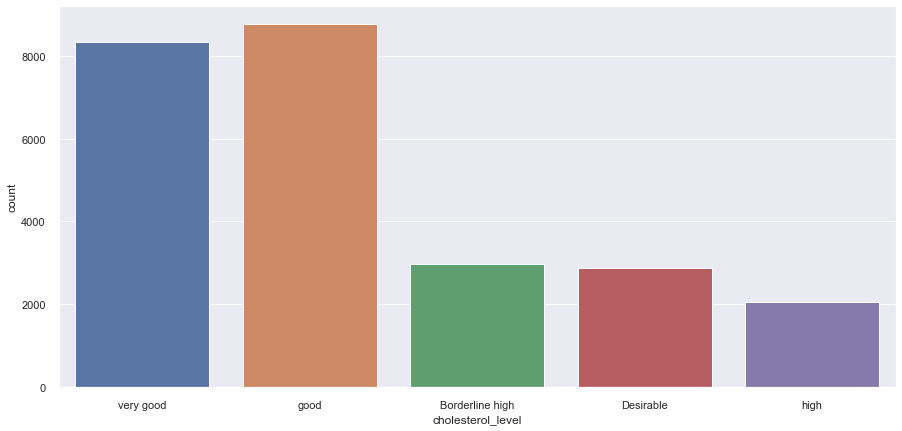

 categories present in heart_decs_history-


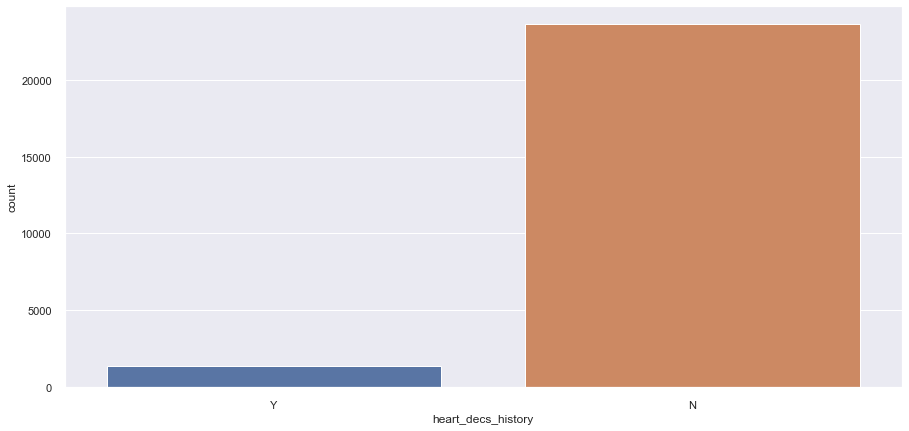

 categories present in other_major_decs_history-


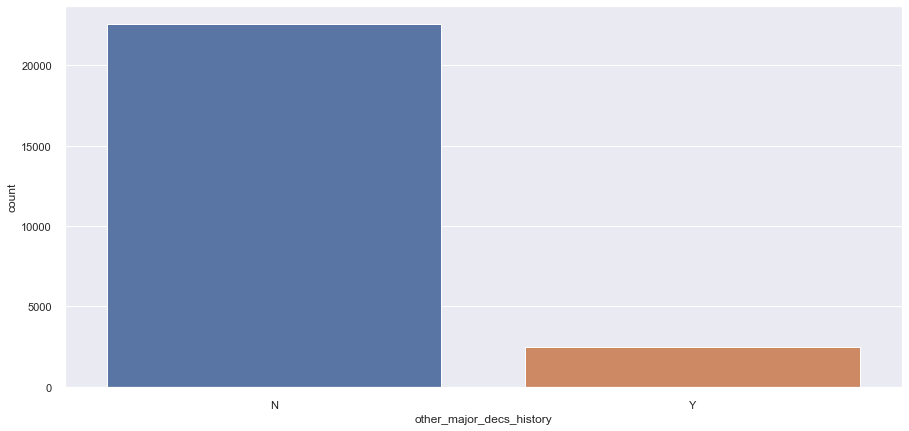

 categories present in Gender-


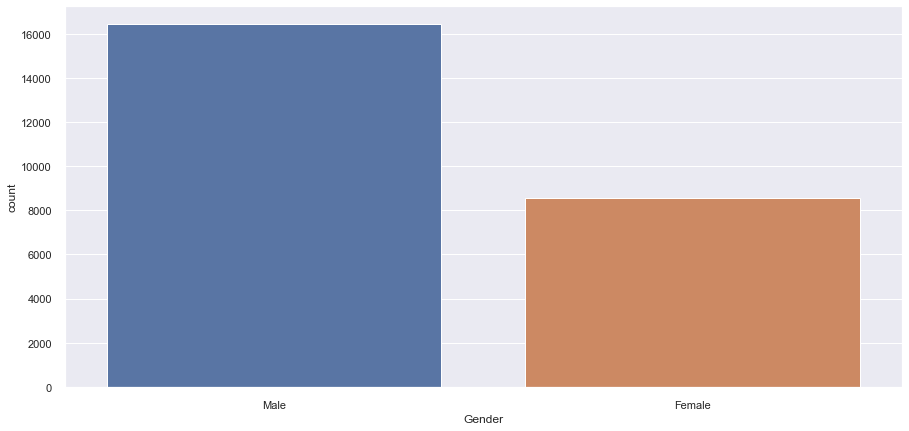

 categories present in smoking_status-


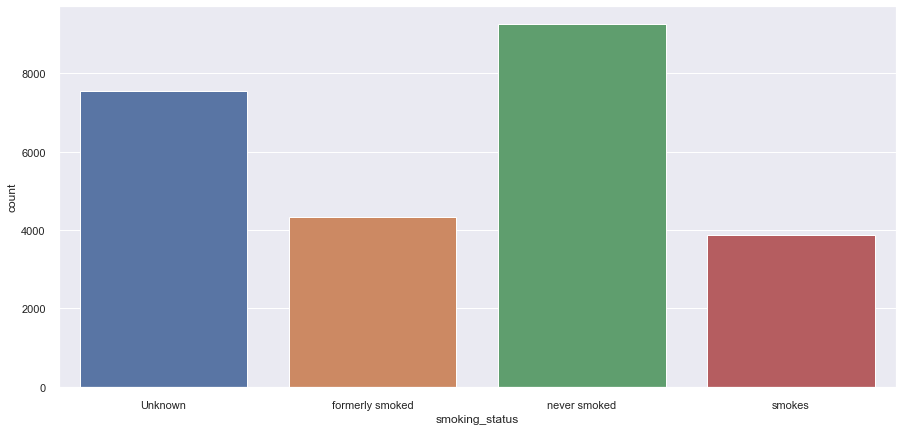

 categories present in Location-


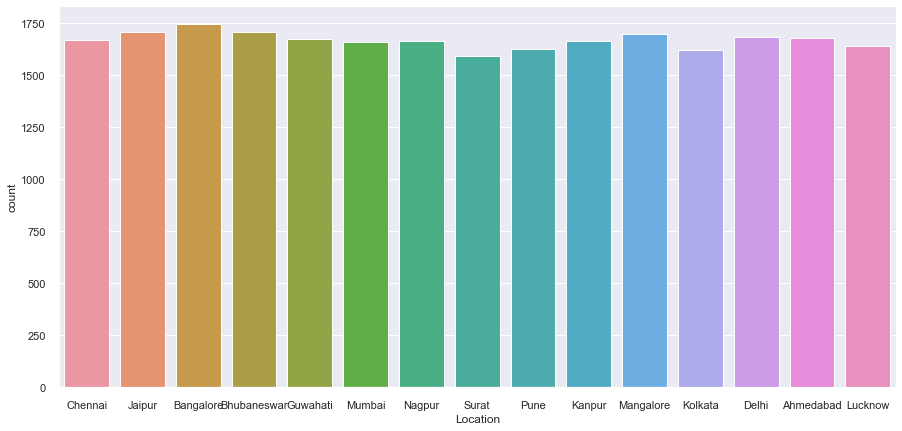

 categories present in covered_by_any_other_company-


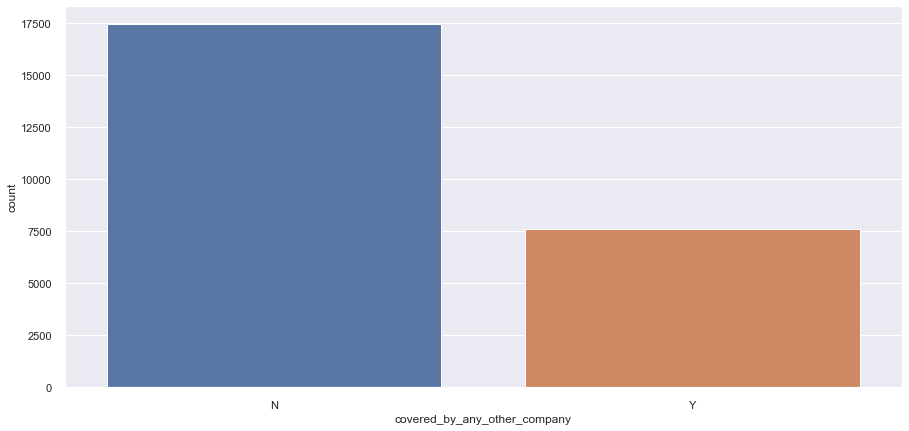

 categories present in Alcohol-


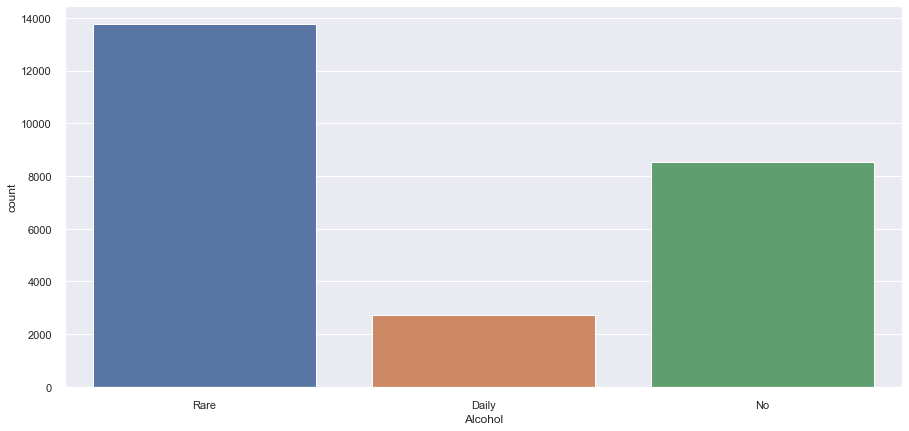

 categories present in exercise-


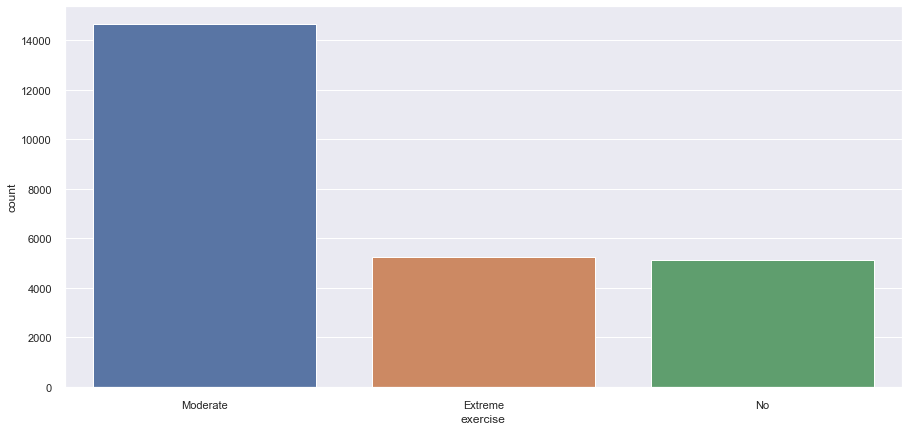

 categories present in Age_Band-


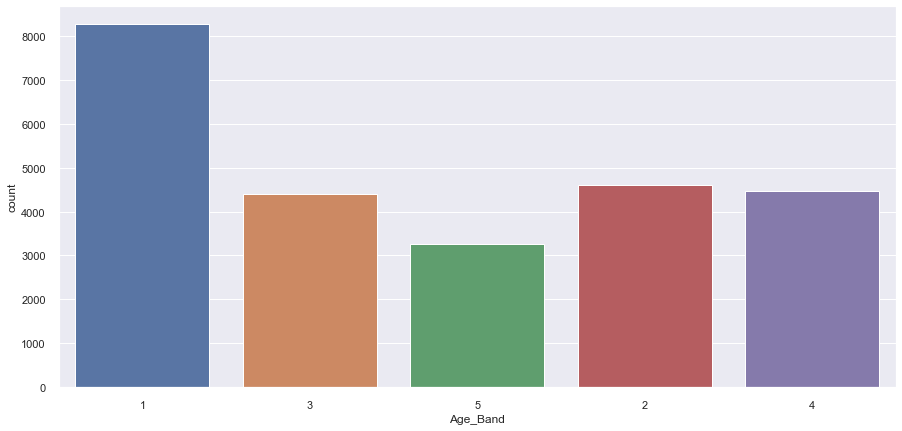

In [330]:
for i in healthcare.columns:
    if healthcare[i].dtype == 'object':
        plt.figure(figsize=(15,7))
        print(' categories present in {}-'.format(i))
        sns.countplot(healthcare[i])
        plt.show();   

### Let's check the value count of the categorical data 

In [331]:
#  Checking unique values for catagorical columns
for column in healthcare.columns:
    if healthcare[column].dtype == "object":
        print(column.upper(), ":",healthcare[column].nunique())
        print(healthcare[column].value_counts().sort_values(ascending=False))
        print('\n')
        print("*"*55)
        print("\n")

ADVENTURE_SPORTS : 2
N    22957
Y     2043
Name: adventure_sports, dtype: int64


*******************************************************


OCCUPATION : 3
Student     10169
Business    10020
Salaried     4811
Name: Occupation, dtype: int64


*******************************************************


CHOLESTEROL_LEVEL : 5
good               8763
very good          8339
Borderline high    2963
Desirable          2881
high               2054
Name: cholesterol_level, dtype: int64


*******************************************************


HEART_DECS_HISTORY : 2
N    23634
Y     1366
Name: heart_decs_history, dtype: int64


*******************************************************


OTHER_MAJOR_DECS_HISTORY : 2
N    22546
Y     2454
Name: other_major_decs_history, dtype: int64


*******************************************************


GENDER : 2
Male      16422
Female     8578
Name: Gender, dtype: int64


*******************************************************


SMOKING_STATUS : 4
never smoke

# Bivariate Analysis

<AxesSubplot:xlabel='years_of_insurance_with_us', ylabel='insurance_cost'>

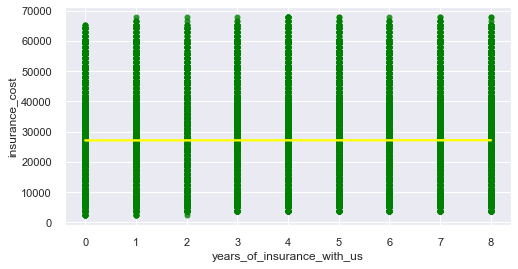

In [332]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.regplot(x="years_of_insurance_with_us", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})


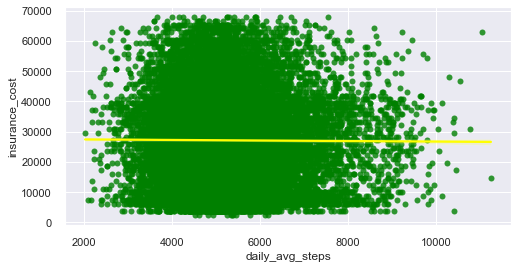

In [333]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
#sns.scatterplot(x='daily_avg_steps', y='insurance_cost', data=healthcare);
sns.regplot(x="daily_avg_steps", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"});

<AxesSubplot:xlabel='age', ylabel='insurance_cost'>

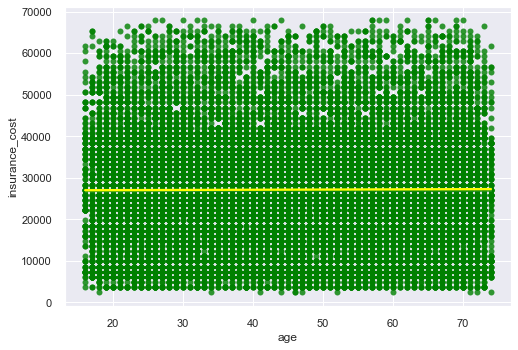

In [334]:
sns.regplot(x="age", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='avg_glucose_level', ylabel='insurance_cost'>

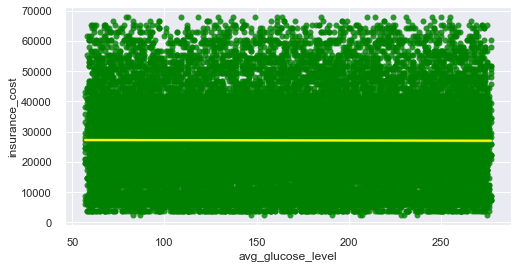

In [335]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
#sns.scatterplot(x='avg_glucose_level', y='insurance_cost', data=healthcare);
sns.regplot(x="avg_glucose_level", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='bmi', ylabel='insurance_cost'>

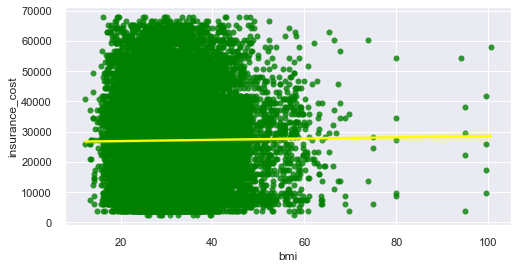

In [336]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
#sns.scatterplot(x='bmi', y='insurance_cost', data=healthcare);
sns.regplot(x="bmi", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='weight', ylabel='insurance_cost'>

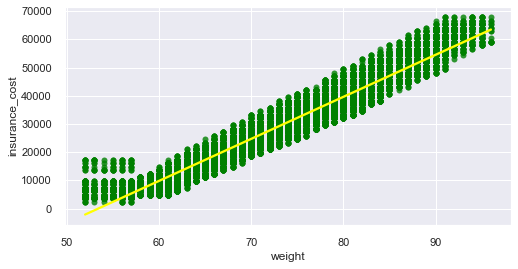

In [337]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
#sns.scatterplot(x='weight', y='insurance_cost', data=healthcare);
sns.regplot(x="weight", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='fat_percentage', ylabel='insurance_cost'>

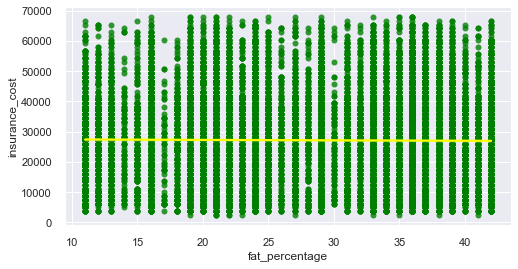

In [338]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
#sns.scatterplot(x='fat_percentage', y='insurance_cost', data=healthcare);
sns.regplot(x="fat_percentage", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='height', ylabel='insurance_cost'>

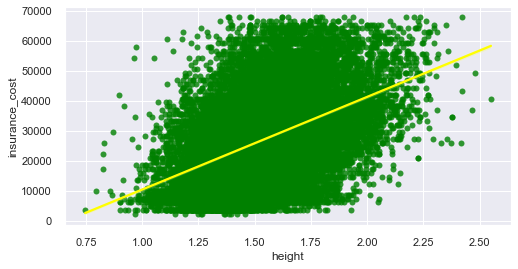

In [339]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
#sns.scatterplot(x='height', y='insurance_cost', data=healthcare);
sns.regplot(x="height", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='weight_change_in_last_one_year', ylabel='insurance_cost'>

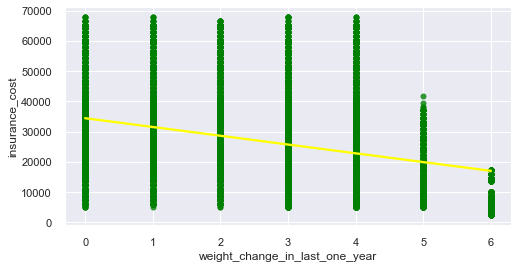

In [340]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.regplot(x="weight_change_in_last_one_year", y="insurance_cost", data=healthcare,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})


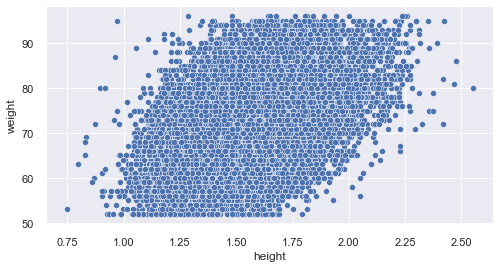

In [341]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='height', y='weight', data=healthcare);

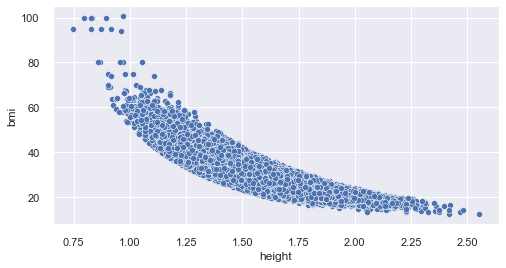

In [342]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='height', y='bmi', data=healthcare);

# Multivariate analysis

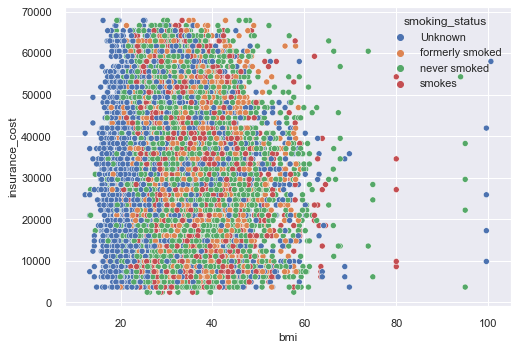

In [343]:
#Let's see if data is showing any relation between bmi and smoking_status has any influence on the insurance cost.
sns.scatterplot(x = 'bmi', y = 'insurance_cost', hue = 'smoking_status', data = healthcare);

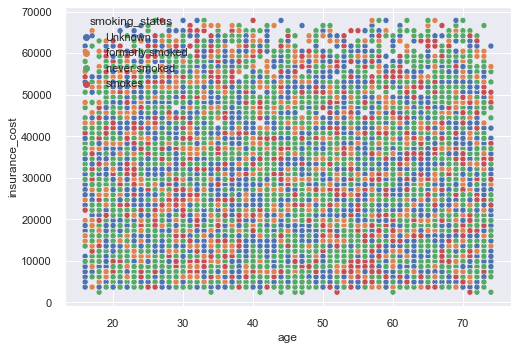

In [344]:
#Checking any relation between age and smoking status has any influence on insurance cost
sns.scatterplot(x = 'age', y = 'insurance_cost', hue = 'smoking_status', data = healthcare);

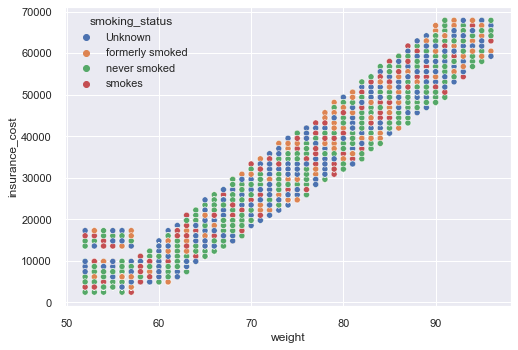

In [345]:
#Checking any relation between age and smoking status has any influence on insurance cost
sns.scatterplot(x = 'weight', y = 'insurance_cost', hue = 'smoking_status', data = healthcare);

In [346]:
#Charges per Location
region_charges = healthcare.groupby(['Location']).agg({'insurance_cost' : sum}).reset_index()
region_charges.sort_values(['insurance_cost'], ascending = False)

Location  insurance_cost
2   Bhubaneswar        46840172
10    Mangalore        46764898
1     Bangalore        46562522
6        Jaipur        46299680
5      Guwahati        45986244
3       Chennai        45856674
12       Nagpur        45322352
4         Delhi        45041000
7        Kanpur        44858368
0     Ahmedabad        44693012
8       Kolkata        44542464
11       Mumbai        44512848
9       Lucknow        44499274
13         Pune        43797128
14        Surat        43108556

Sum of charges per location is not showing much of difference.

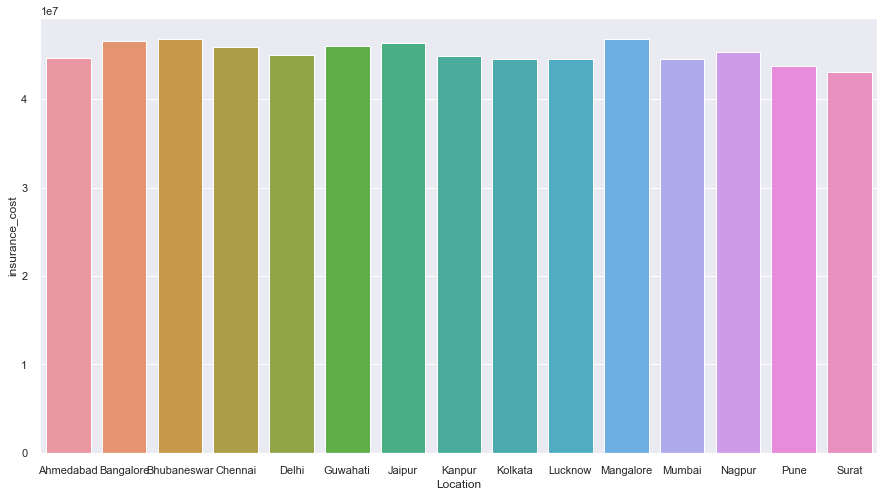

In [347]:
#Barplot Charges per Region
plt.figure(figsize=(15, 8))
sns.barplot(x = 'Location', y ='insurance_cost', data = region_charges);

<AxesSubplot:xlabel='Location', ylabel='insurance_cost'>

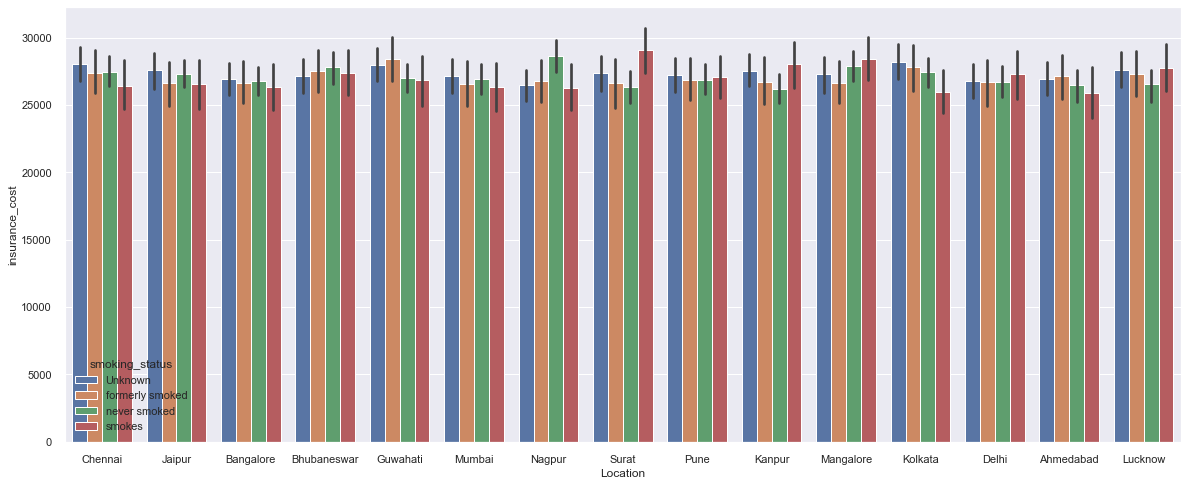

In [348]:
#Barplot with Hue Smoker
plt.figure(figsize=(20, 8))
sns.barplot(x = healthcare['Location'], y = healthcare['insurance_cost'], hue = healthcare['smoking_status'], data = healthcare)

no drastic visible difference but The above plot shows that in Surat location applicant who smokes is paying higher insurance cost.

<AxesSubplot:xlabel='Location', ylabel='insurance_cost'>

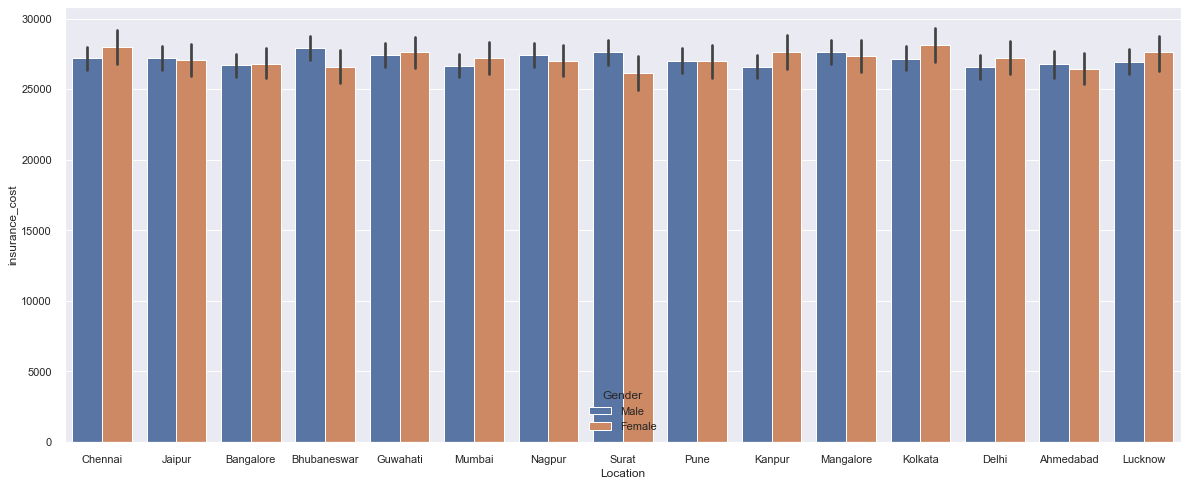

In [349]:
#Barplot with Hue Sex
plt.figure(figsize=(20, 8))
sns.barplot(x = healthcare['Location'], y = healthcare['insurance_cost'], hue = 'Gender', data = healthcare)

In [350]:
#Count Smoker with Gender Hue
smoker_sex = healthcare.groupby(['smoking_status', 'Gender']).agg({'insurance_cost' : 'count'}).reset_index()
smoker_sex.columns = ['smoking_status', 'Gender', 'count']
smoker_sex.sort_values(['smoking_status', 'count'], ascending = False)

smoking_status  Gender  count
7           smokes    Male   2992
6           smokes  Female    875
5     never smoked    Male   6668
4     never smoked  Female   2581
3  formerly smoked    Male   3610
2  formerly smoked  Female    719
0          Unknown  Female   4403
1          Unknown    Male   3152

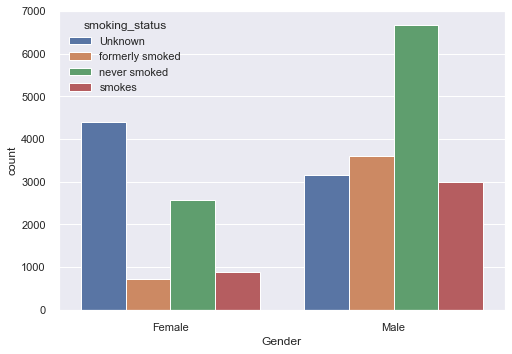

In [351]:
#Barplot Visualization
sns.barplot(x = smoker_sex['Gender'], y = smoker_sex['count'], hue = smoker_sex['smoking_status'], data = smoker_sex);

In [352]:
#Count Smoker with Gender Hue
alcohol_sex = healthcare.groupby(['Alcohol', 'Gender']).agg({'insurance_cost' : 'count'}).reset_index()
alcohol_sex.columns = ['Alcohol', 'Gender', 'count']
alcohol_sex.sort_values(['Alcohol', 'count'], ascending = False)

Alcohol  Gender  count
5    Rare    Male   9043
4    Rare  Female   4709
3      No    Male   5627
2      No  Female   2914
1   Daily    Male   1752
0   Daily  Female    955

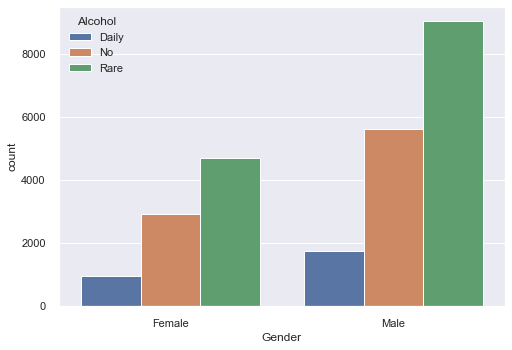

In [353]:
#Barplot Visualization
sns.barplot(x = alcohol_sex['Gender'], y = alcohol_sex['count'], hue = alcohol_sex['Alcohol'], data = alcohol_sex);

<AxesSubplot:xlabel='regular_checkup_last_year', ylabel='insurance_cost'>

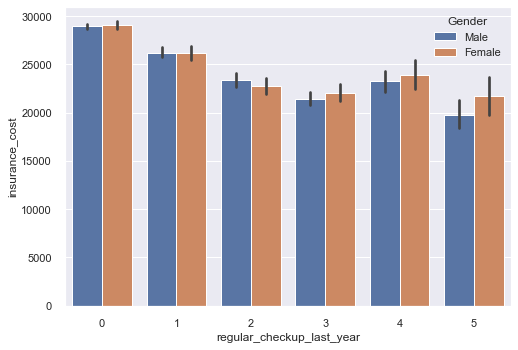

In [354]:
#Barplot with Hue Sex
sns.barplot(x = healthcare['regular_checkup_last_year'], y = healthcare['insurance_cost'], hue = healthcare['Gender'], data = healthcare)

<AxesSubplot:xlabel='weight_change_in_last_one_year', ylabel='insurance_cost'>

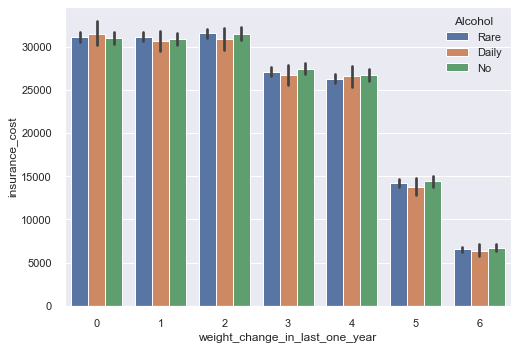

In [355]:
#Barplot with Hue Smokers
sns.barplot(x = healthcare['weight_change_in_last_one_year'], y = healthcare['insurance_cost'], hue = healthcare['Alcohol'], data = healthcare)

In [356]:
#Feature Engineering weight_status
healthcare['weight_status'] = np.where(healthcare['bmi'] < 18.000, 'underweigth',
                               np.where(healthcare['bmi'] < 25.000, 'normal',
                                       np.where(healthcare['bmi'] < 30.000, 'overweight', 'obese')))
healthcare

years_of_insurance_with_us  regular_checkup_last_year  \
applicant_id                                                          
5000                                   3                          1   
5001                                   0                          0   
5002                                   1                          0   
5003                                   7                          4   
5004                                   3                          1   
...                                  ...                        ...   
29995                                  3                          0   
29996                                  6                          0   
29997                                  7                          0   
29998                                  1                          0   
29999                                  8                          2   

             adventure_sports Occupation  visited_doctor_last_1_year  \
applicant_id                                                           
5000                        Y   Salaried                           2   
5001                        N    Student                           4   
5002                        N   Business                           4   
5003                        N   Business                           2   
5004                        N    Student                           2   
...                       ...        ...                         ...   
29995                       N   Salaried                           4   
29996                       N   Business                           4   
29997                       Y    Student                           2   
29998                       N   Salaried                           2   
29999                       N   Business                           4   

             cholesterol_level  daily_avg_steps  age heart_decs_history  \
applicant_id                                                              
5000                 very good             4866   28                  Y   
5001                      good             6411   50                  N   
5002           Borderline high             4509   68                  N   
5003                 Desirable             6214   51                  N   
5004                      good             4938   44                  N   
...                        ...              ...  ...                ...   
29995                     high             5614   22                  N   
29996          Borderline high             4719   58                  N   
29997                     good             5624   34                  N   
29998                     high            10777   27                  N   
29999                     good             5882   22                  Y   

             other_major_decs_history  Gender  avg_glucose_level     bmi  \
applicant_id                                                               
5000                                N    Male                 97  31.200   
5001                                N    Male                212  34.200   
5002                                N  Female                166  40.400   
5003                                N  Female                109  22.900   
5004                                Y    Male                118  26.500   
...                               ...     ...                ...     ...   
29995                               N    Male                145  36.100   
29996                               N    Male                134  31.300   
29997                               Y    Male                151  34.656   
29998                               N    Male                 66  26.600   
29999                               N    Male                245  41.600   

               smoking_status     Location  weight  \
applicant_id                                         
5000                  Unknown      Chennai      67   
5001          formerly smo

In [357]:
#Count Weight_Status with Hue Smoker
smoker_status = healthcare.groupby(['weight_status', 'smoking_status']).agg({'insurance_cost' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoking_status', 'count')
smoker_status

weight_status   smoking_status  count
0         normal          Unknown   2695
1         normal  formerly smoked    410
2         normal     never smoked   1165
3         normal           smokes    336
4          obese          Unknown   2735
5          obese  formerly smoked   2825
6          obese     never smoked   5400
7          obese           smokes   2381
8     overweight          Unknown   1828
9     overweight  formerly smoked   1090
10    overweight     never smoked   2666
11    overweight           smokes   1146
12   underweigth          Unknown    297
13   underweigth  formerly smoked      4
14   underweigth     never smoked     18
15   underweigth           smokes      4

<AxesSubplot:xlabel='weight_status', ylabel='count'>

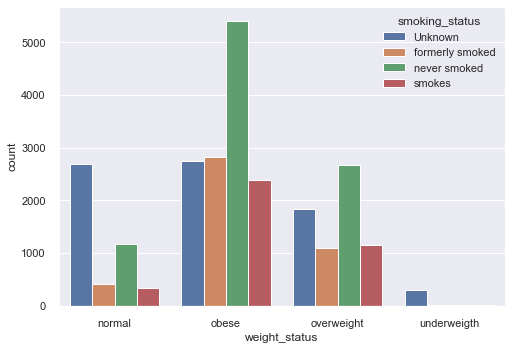

In [358]:
#Barplot Smoker_Status
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoking_status', data = smoker_status)

In [359]:
#Count Weight_Status with Hue Smoker
smoker_status = healthcare.groupby(['weight_status', 'smoking_status']).agg({'insurance_cost' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoking_status', 'insurance_cost')
smoker_status 

weight_status   smoking_status  insurance_cost
0         normal          Unknown        73567378
1         normal  formerly smoked        10622272
2         normal     never smoked        31478106
3         normal           smokes         8691062
4          obese          Unknown        75019796
5          obese  formerly smoked        77265676
6          obese     never smoked       146865744
7          obese           smokes        65153966
8     overweight          Unknown        49740072
9     overweight  formerly smoked        29135974
10    overweight     never smoked        71585574
11    overweight           smokes        30613072
12   underweigth          Unknown         8252992
13   underweigth  formerly smoked           85146
14   underweigth     never smoked          536790
15   underweigth           smokes           71572

In [360]:
#Insurance Cost based on Weight_Status and smoker
smoker_status_charges = healthcare.groupby(['weight_status', 'smoking_status']).agg({'insurance_cost' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoking_status', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

weight_status   smoking_status  count  total
0         normal          Unknown   2695   4606
1         normal  formerly smoked    410   4606
2         normal     never smoked   1165   4606
3         normal           smokes    336   4606
4          obese          Unknown   2735  13341
5          obese  formerly smoked   2825  13341
6          obese     never smoked   5400  13341
7          obese           smokes   2381  13341
8     overweight          Unknown   1828   6730
9     overweight  formerly smoked   1090   6730
10    overweight     never smoked   2666   6730
11    overweight           smokes   1146   6730
12   underweigth          Unknown    297    323
13   underweigth  formerly smoked      4    323
14   underweigth     never smoked     18    323
15   underweigth           smokes      4    323

<AxesSubplot:xlabel='weight_status', ylabel='count'>

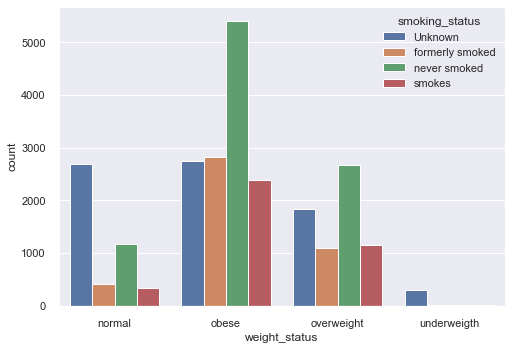

In [361]:
#Barplot Smoker_Status_Charges
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoking_status', data = smoker_status_charges)

In [362]:
#Merge Columns
condition_cost = smoker_status.merge(smoker_status_charges, 
                   left_on = ['weight_status', 'smoking_status'],
                    right_on = ['weight_status', 'smoking_status'],
                    how = 'inner')
condition_cost

weight_status   smoking_status  insurance_cost  count  total
0         normal          Unknown        73567378   2695   4606
1         normal  formerly smoked        10622272    410   4606
2         normal     never smoked        31478106   1165   4606
3         normal           smokes         8691062    336   4606
4          obese          Unknown        75019796   2735  13341
5          obese  formerly smoked        77265676   2825  13341
6          obese     never smoked       146865744   5400  13341
7          obese           smokes        65153966   2381  13341
8     overweight          Unknown        49740072   1828   6730
9     overweight  formerly smoked        29135974   1090   6730
10    overweight     never smoked        71585574   2666   6730
11    overweight           smokes        30613072   1146   6730
12   underweigth          Unknown         8252992    297    323
13   underweigth  formerly smoked           85146      4    323
14   underweigth     never smoked          536790     18    323
15   underweigth           smokes           71572      4    323

In [363]:
#Average Charges
condition_cost['avg_charges'] = condition_cost['insurance_cost'] / condition_cost['count']
condition_cost

weight_status   smoking_status  insurance_cost  count  total   avg_charges
0         normal          Unknown        73567378   2695   4606  27297.728386
1         normal  formerly smoked        10622272    410   4606  25907.980488
2         normal     never smoked        31478106   1165   4606  27019.833476
3         normal           smokes         8691062    336   4606  25866.255952
4          obese          Unknown        75019796   2735  13341  27429.541499
5          obese  formerly smoked        77265676   2825  13341  27350.681770
6          obese     never smoked       146865744   5400  13341  27197.360000
7          obese           smokes        65153966   2381  13341  27364.118438
8     overweight          Unknown        49740072   1828   6730  27210.105033
9     overweight  formerly smoked        29135974   1090   6730  26730.251376
10    overweight     never smoked        71585574   2666   6730  26851.303076
11    overweight           smokes        30613072   1146   6730  26712.977312
12   underweigth          Unknown         8252992    297    323  27787.851852
13   underweigth  formerly smoked           85146      4    323  21286.500000
14   underweigth     never smoked          536790     18    323  29821.666667
15   underweigth           smokes           71572      4    323  17893.000000

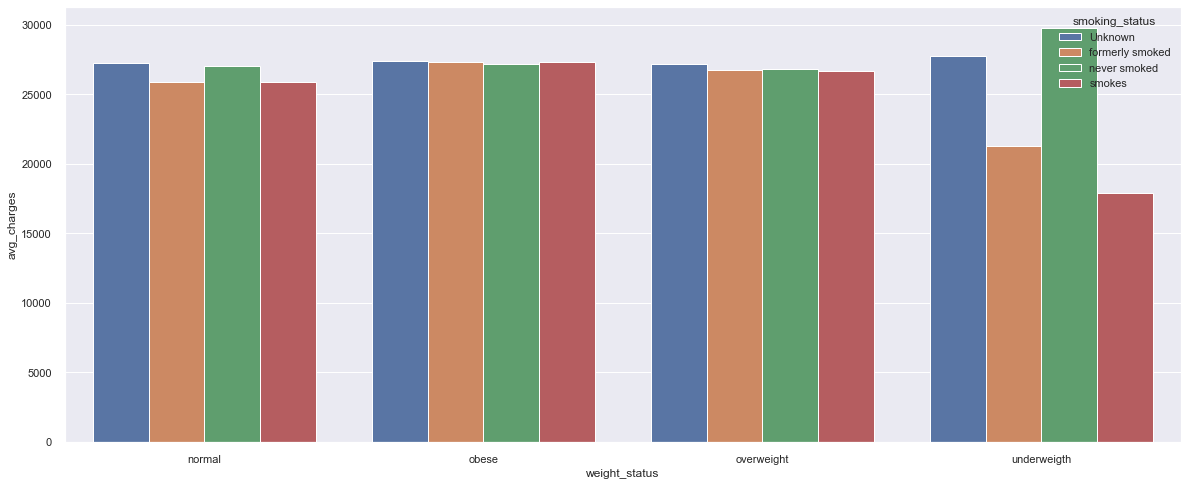

In [364]:
#Average Charges Barplot
plt.figure(figsize=(20, 8))
sns.barplot(x = 'weight_status', y = 'avg_charges', hue = 'smoking_status', data = condition_cost);

In [365]:
healthcare.drop("weight_status", axis=1, inplace=True)

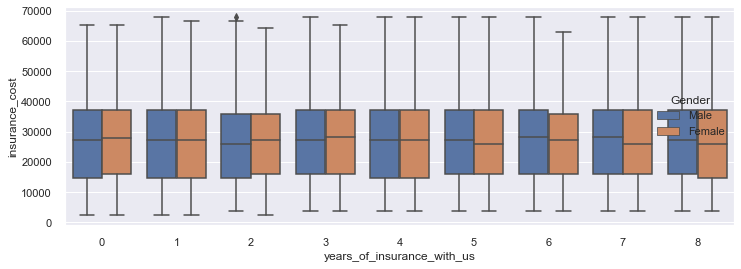

In [366]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'years_of_insurance_with_us', y = "insurance_cost", hue = "Gender", data=healthcare);

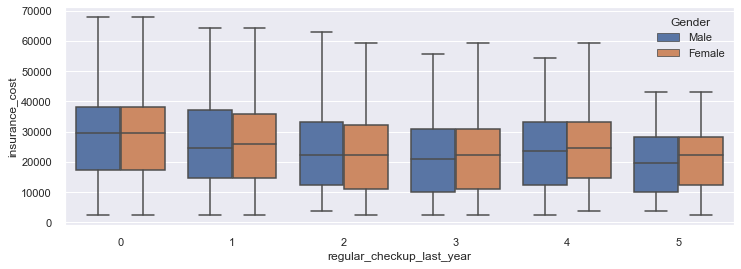

In [367]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'regular_checkup_last_year', y = "insurance_cost", hue = "Gender", data=healthcare);

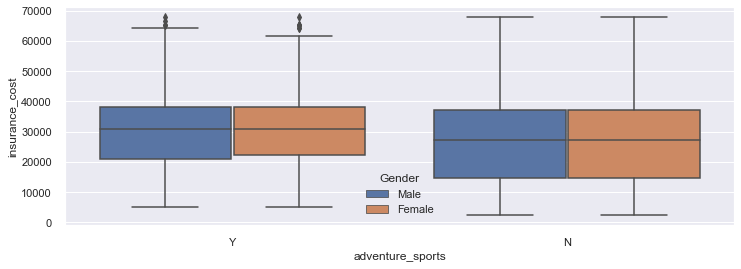

In [368]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'adventure_sports', y = "insurance_cost", hue = "Gender", data=healthcare);

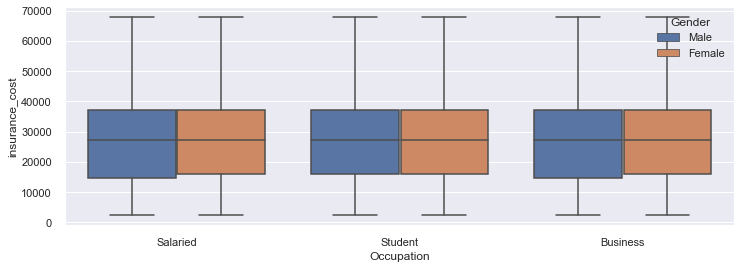

In [369]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'Occupation', y = "insurance_cost", hue = "Gender", data=healthcare);

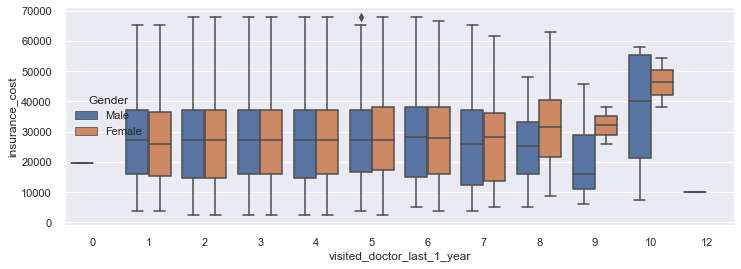

In [370]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "visited_doctor_last_1_year", y = "insurance_cost", hue = "Gender", data=healthcare);

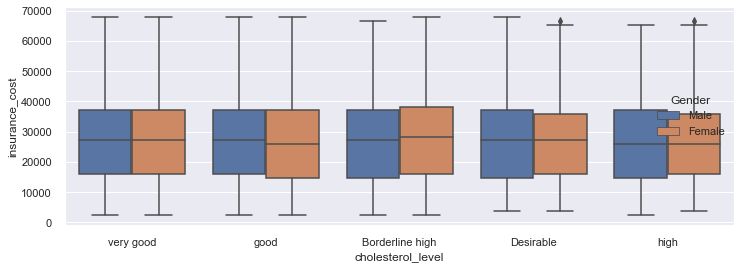

In [371]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "cholesterol_level", y = "insurance_cost", hue = "Gender", data=healthcare);

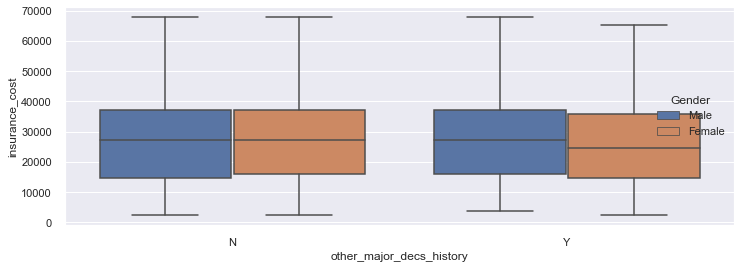

In [372]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "other_major_decs_history", y = "insurance_cost", hue = "Gender", data=healthcare);

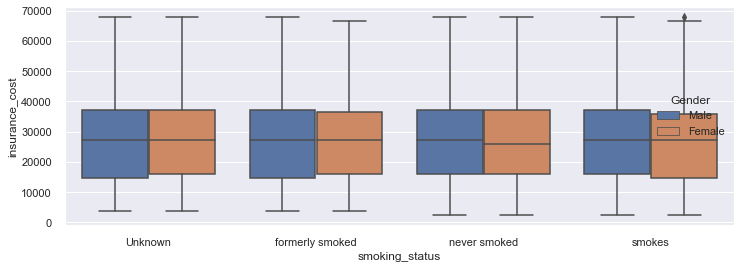

In [373]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "smoking_status", y = "insurance_cost", hue = "Gender", data=healthcare);

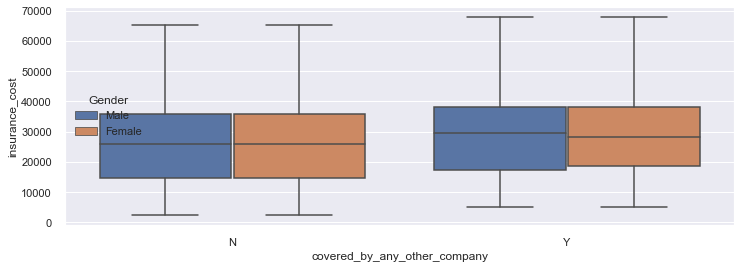

In [374]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "covered_by_any_other_company", y = "insurance_cost", hue = "Gender", data=healthcare);

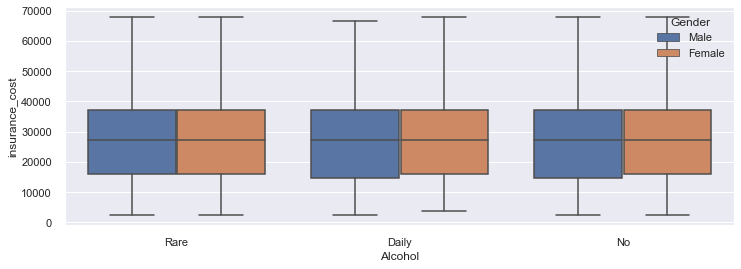

In [375]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "Alcohol", y = "insurance_cost", hue = "Gender", data=healthcare);

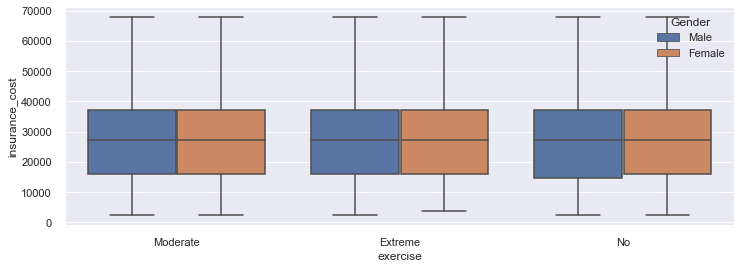

In [376]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "exercise", y = "insurance_cost", hue = "Gender", data=healthcare);

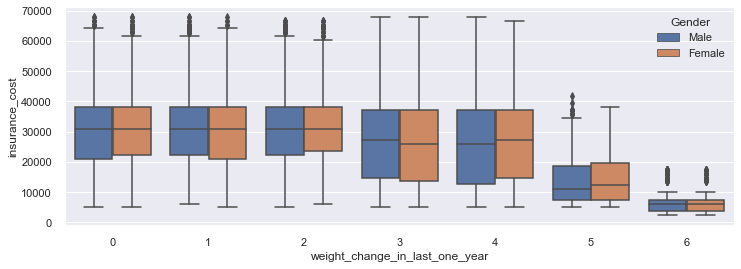

In [377]:
plt.figure(figsize=(12, 4))
sns.boxplot(x = "weight_change_in_last_one_year", y = "insurance_cost", hue = "Gender", data=healthcare);

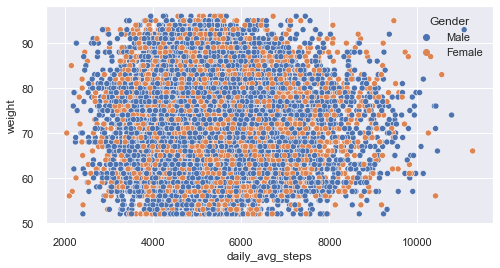

In [378]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='daily_avg_steps', y='weight', hue='Gender', data=healthcare);

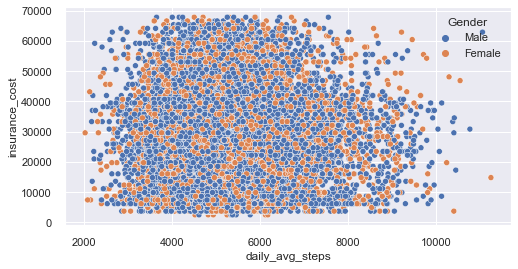

In [379]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='daily_avg_steps', y='insurance_cost', hue='Gender', data=healthcare);

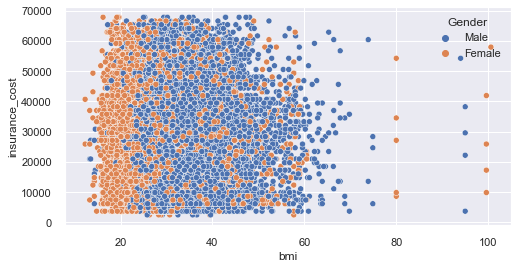

In [380]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='bmi', y='insurance_cost', hue='Gender', data=healthcare);

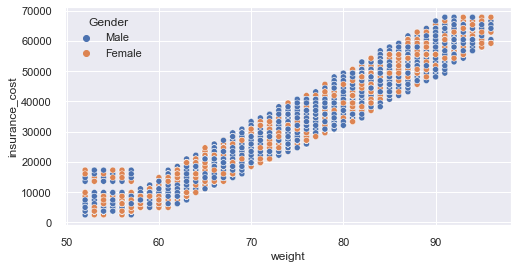

In [381]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='weight', y='insurance_cost', hue='Gender', data=healthcare);

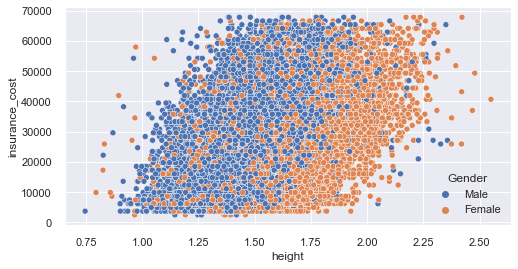

In [382]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='height', y='insurance_cost', hue='Gender', data=healthcare);

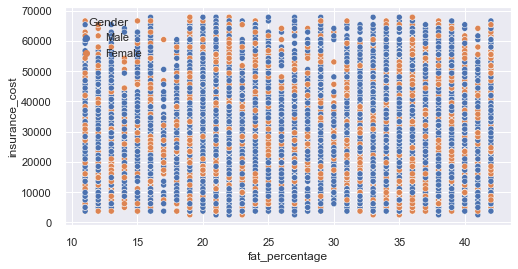

In [383]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='fat_percentage', y='insurance_cost', hue='Gender', data=healthcare);

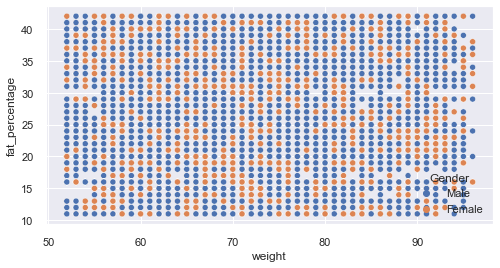

In [384]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='weight', y='fat_percentage', hue='Gender', data=healthcare);

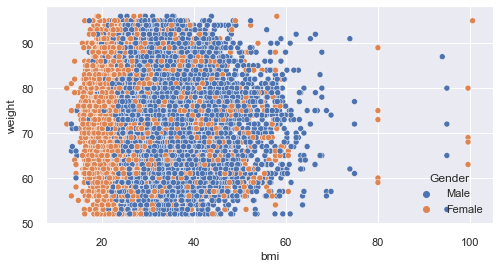

In [385]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='bmi', y='weight', hue='Gender', data=healthcare);

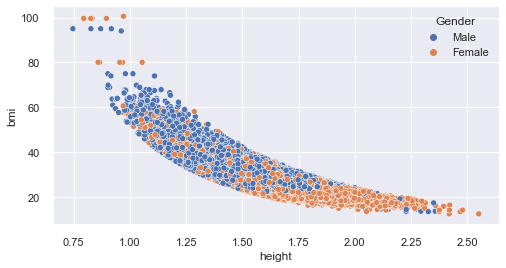

In [386]:
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.scatterplot(x='height', y='bmi', hue='Gender', data=healthcare);

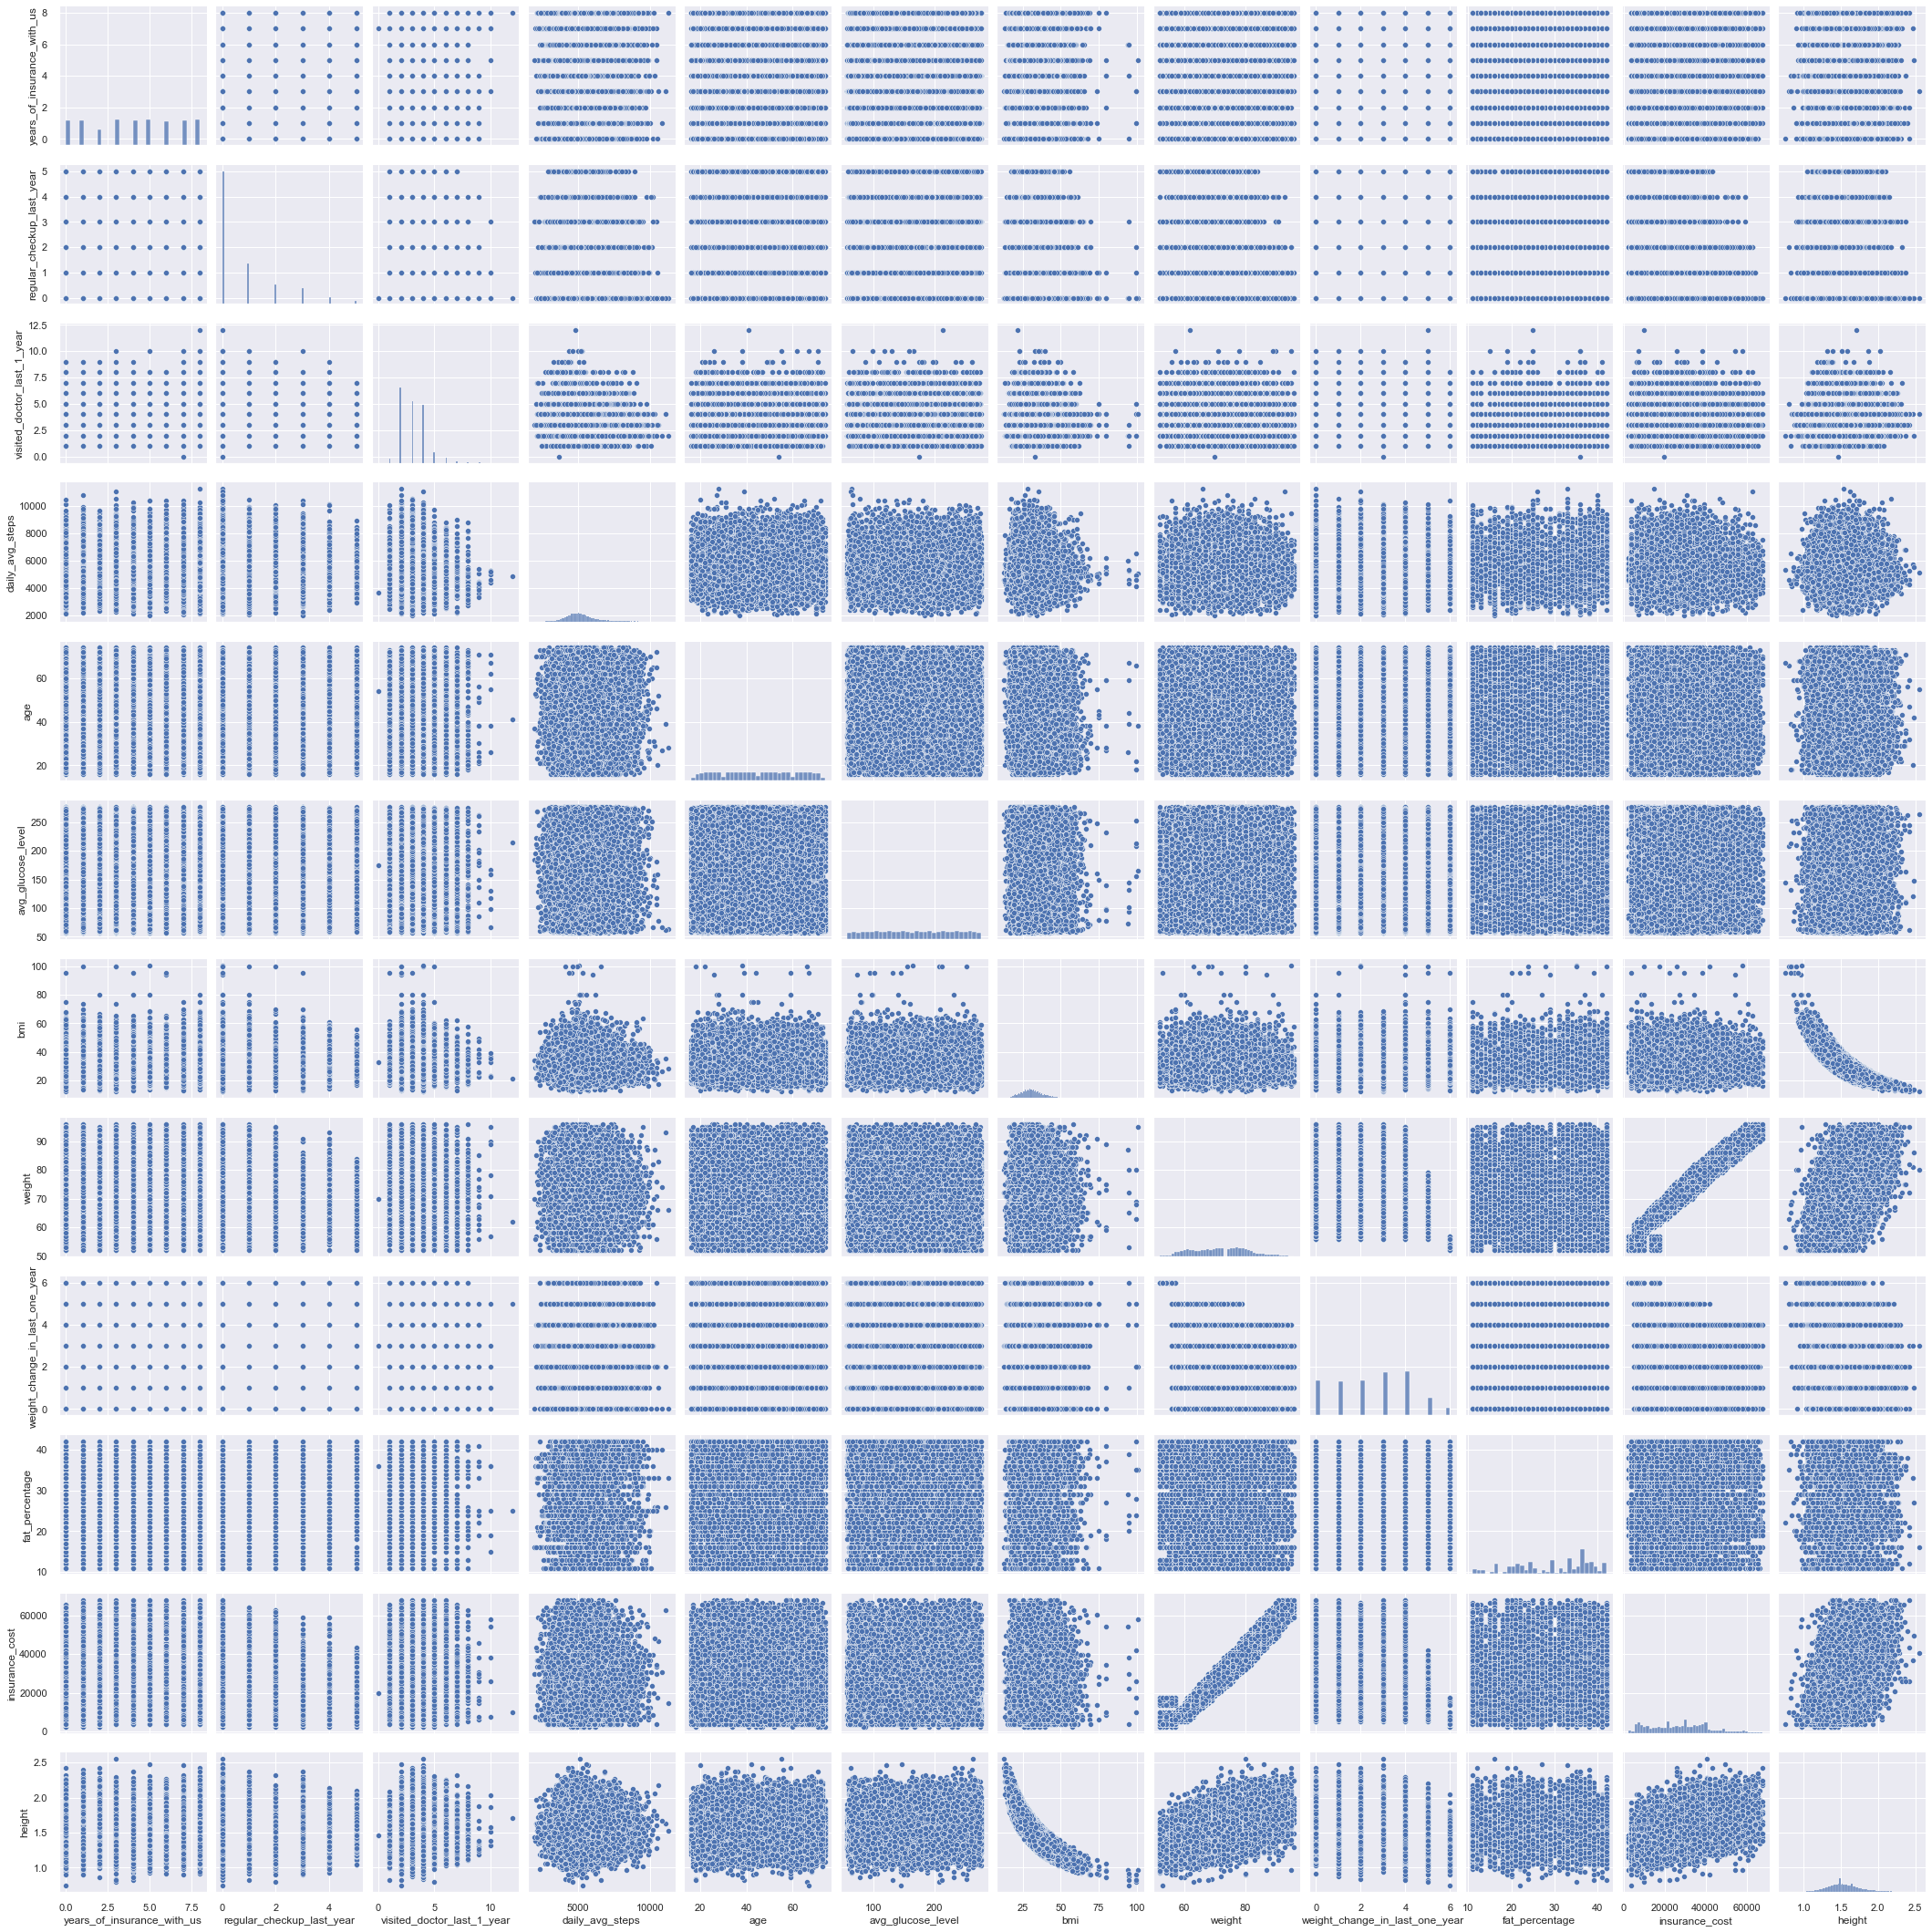

In [387]:
sns.pairplot(healthcare);

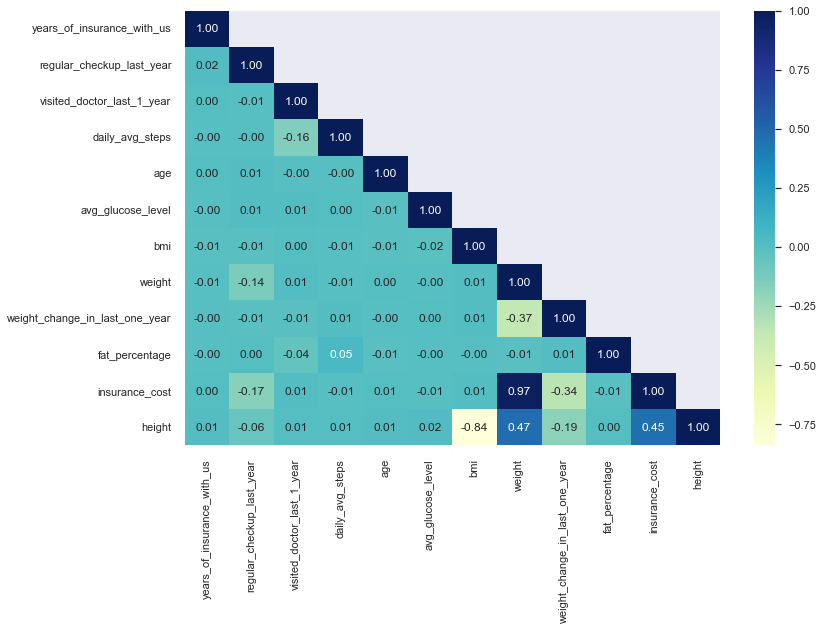

In [388]:
plt.figure(figsize=(12,8))
sns.heatmap(healthcare.corr(),annot=True,fmt='.2f',cmap='YlGnBu',mask=np.triu(healthcare.corr(),+1))
plt.show()

## Let's fix the outliers now

### bmi,height, dailyy_avg_steps is showing outliers, let us fix this anomaly

In [389]:
healthcare['bmi'].describe()

count    25000.000000
mean        31.376222
std          7.778128
min         12.300000
25%         26.100000
50%         30.500000
75%         35.500000
max        100.600000
Name: bmi, dtype: float64

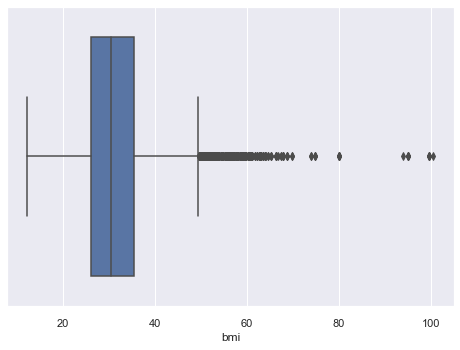

In [390]:
sns.boxplot(x=healthcare.bmi);

In [391]:
from scipy import stats
Q1=healthcare['bmi'].quantile(q=0.25)
Q3=healthcare['bmi'].quantile(q=0.75)
print('Q1_bmi: ', Q1)
print('Q3_bmi: ', Q3)
print('IQR_bmi', stats.iqr(healthcare['bmi']))

Q1_bmi:  26.10000000000001
Q3_bmi:  35.5
IQR_bmi 9.399999999999991


In [392]:
lr=Q1-1.5*(Q3-Q1)
ur=Q3+1.5*(Q3-Q1)
print('lower range = ',lr)
print('Upper Range = ', ur)

lower range =  12.000000000000021
Upper Range =  49.59999999999999


In [393]:
healthcare['bmi']=np.where(healthcare['bmi']>ur,ur,healthcare['bmi'])
healthcare['bmi']=np.where(healthcare['bmi']<lr,lr,healthcare['bmi'])

In [394]:
healthcare['bmi'].describe()

count    25000.000000
mean        31.221198
std          7.244745
min         12.300000
25%         26.100000
50%         30.500000
75%         35.500000
max         49.600000
Name: bmi, dtype: float64

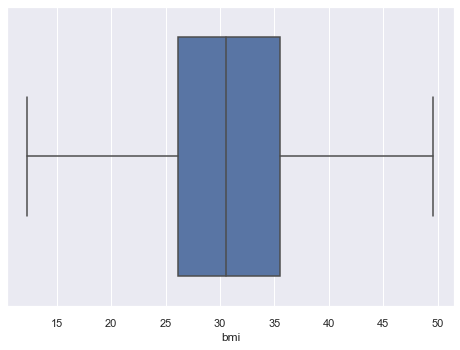

In [395]:
sns.boxplot(x= healthcare.bmi);

In [396]:
healthcare['height'].describe()

count    25000.000000
mean         1.540621
std          0.210860
min          0.746924
25%          1.399428
50%          1.521094
75%          1.666109
max          2.550307
Name: height, dtype: float64

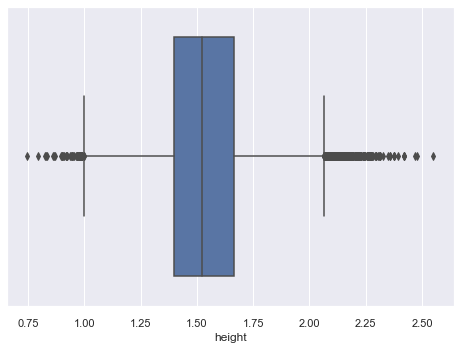

In [397]:
sns.boxplot(x=healthcare.height);

In [398]:
from scipy import stats
Q1=healthcare['height'].quantile(q=0.25)
Q3=healthcare['height'].quantile(q=0.75)
print('Q1_height: ', Q1)
print('Q3_height: ', Q3)
print('IQR_height', stats.iqr(healthcare['height']))

Q1_height:  1.399428049042695
Q3_height:  1.66610915982161
IQR_height 0.2666811107789151


In [399]:
lr=Q1-1.5*(Q3-Q1)
ur=Q3+1.5*(Q3-Q1)
print('lower range = ',lr)
print('Upper Range = ', ur)

lower range =  0.9994063828743223
Upper Range =  2.0661308259899824


In [400]:
healthcare['height']=np.where(healthcare['height']>ur,ur,healthcare['height'])
healthcare['height']=np.where(healthcare['height']<lr,lr,healthcare['height'])

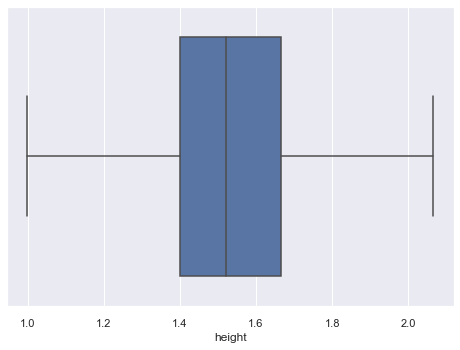

In [401]:
sns.boxplot(x= healthcare.height);

In [402]:
healthcare['daily_avg_steps'].describe()

count    25000.000000
mean      5215.889320
std       1053.179748
min       2034.000000
25%       4543.000000
50%       5089.000000
75%       5730.000000
max      11255.000000
Name: daily_avg_steps, dtype: float64

In [403]:
from scipy import stats
Q1=healthcare['daily_avg_steps'].quantile(q=0.25)
Q3=healthcare['daily_avg_steps'].quantile(q=0.75)
print('Q1_daily_avg_steps: ', Q1)
print('Q3_daily_avg_steps: ', Q3)
print('IQR_daily_avg_steps', stats.iqr(healthcare['daily_avg_steps']))

Q1_daily_avg_steps:  4543.0
Q3_daily_avg_steps:  5730.0
IQR_daily_avg_steps 1187.0


In [404]:
lr=Q1-1.5*(Q3-Q1)
ur=Q3+1.5*(Q3-Q1)
print('lower range = ',lr)
print('Upper Range = ', ur)

lower range =  2762.5
Upper Range =  7510.5


In [405]:
healthcare['daily_avg_steps']=np.where(healthcare['daily_avg_steps']>ur,ur,healthcare['daily_avg_steps'])
healthcare['daily_avg_steps']=np.where(healthcare['daily_avg_steps']<lr,lr,healthcare['daily_avg_steps'])

In [406]:
healthcare['daily_avg_steps'].describe()

count    25000.000000
mean      5189.022720
std        969.591482
min       2762.500000
25%       4543.000000
50%       5089.000000
75%       5730.000000
max       7510.500000
Name: daily_avg_steps, dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

### Count / Frequency Encoding

Replace each category with its frequency/number of time that category occurred in that column.

In [407]:
# Occupation_Dict = df1['Occupation'].value_counts()
# cholesterol_level_Dict = df1['cholesterol_level'].value_counts()
# Gender_Dict = df1['Gender'].value_counts()
# smoking_status_Dict = df1['smoking_status'].value_counts()
# Location_Dict = df1['Location'].value_counts()
# covered_by_any_other_company_Dict = df1['covered_by_any_other_company'].value_counts()
# Alcohol_Dict = df1['Alcohol'].value_counts()
# exercise_Dict = df1['exercise'].value_counts()
# #Location_Dict = df1['Location'].value_counts()
# #Location_Dict = df1['Location'].value_counts()

In [408]:
# df1['Occupation_map'] = df1['Occupation'].map(Occupation_Dict)
# df1['cholesterol_level_map'] = df1['cholesterol_level'].map(cholesterol_level_Dict)
# df1['Gender_map'] = df1['Gender'].map(Gender_Dict)
# df1['smoking_status_map'] = df1['smoking_status'].map(smoking_status_Dict)
# df1['covered_by_any_other_company_map'] = df1['covered_by_any_other_company'].map(covered_by_any_other_company_Dict)
# df1['Location_map'] = df1['Location'].map(Location_Dict)
# df1['Alcohol_map'] = df1['Alcohol'].map(Alcohol_Dict)
# df1['exercise_map'] = df1['exercise'].map(exercise_Dict)

In [409]:
healthcare.head()

years_of_insurance_with_us  regular_checkup_last_year  \
applicant_id                                                          
5000                                   3                          1   
5001                                   0                          0   
5002                                   1                          0   
5003                                   7                          4   
5004                                   3                          1   

             adventure_sports Occupation  visited_doctor_last_1_year  \
applicant_id                                                           
5000                        Y   Salaried                           2   
5001                        N    Student                           4   
5002                        N   Business                           4   
5003                        N   Business                           2   
5004                        N    Student                           2   

             cholesterol_level  daily_avg_steps  age heart_decs_history  \
applicant_id                                                              
5000                 very good           4866.0   28                  Y   
5001                      good           6411.0   50                  N   
5002           Borderline high           4509.0   68                  N   
5003                 Desirable           6214.0   51                  N   
5004                      good           4938.0   44                  N   

             other_major_decs_history  Gender  avg_glucose_level   bmi  \
applicant_id                                                             
5000                                N    Male                 97  31.2   
5001                                N    Male                212  34.2   
5002                                N  Female                166  40.4   
5003                                N  Female                109  22.9   
5004                                Y    Male                118  26.5   

               smoking_status   Location  weight covered_by_any_other_company  \
applicant_id                                                                    
5000                  Unknown    Chennai      67                            N   
5001          formerly smoked     Jaipur      58                            N   
5002          formerly smoked     Jaipur      73                            N   
5003                  Unknown    Chennai      71                            Y   
5004             never smoked  Bangalore      74                            N   

             Alcohol  exercise  weight_change_in_last_one_year  \
applicant_id                                                     
5000            Rare  Moderate                               1   
5001            Rare  Moderate                               3   
5002           Daily   Extreme                               0   
5003            Rare        No                               3   
5004              No   Extreme                               0   

              fat_percentage  insurance_cost    height Age_Band  
applicant_id                                                     
5000                      25           20978  1.465413        1  
5001                      27            6170  1.302270        3  
5002                      32           28382  1.344221        5  
5003                      37           27148  1.760806        3  
5004                      34           29616  1.671063        2

Target/Guided Encoding
Here, the category of the column has been replaced with its depending join probability ranking with respect to Target column.
- Replace original value with the first two characters of the name.
-  Calculate the joint probability of each category based on the target column value.
- Create a list with sorted index in ascending order of join probabilities.
- Create a dictionary where key as category name and values as joint probability ranking.
- Create a new column and map cabin values with dictionary joint probability ranking.
- Delete original cabin column.

In [410]:
healthcare['Occupation'] = healthcare['Occupation'].astype(str).str[:2]
healthcare['Location'] = healthcare['Location'].astype(str).str[:2]
healthcare['Alcohol'] = healthcare['Alcohol'].astype(str).str[:2]
healthcare['smoking_status'] = healthcare['smoking_status'].astype(str).str[:2]
healthcare['exercise'] = healthcare['exercise'].astype(str).str[:2]
healthcare['cholesterol_level'] = healthcare['cholesterol_level'].astype(str).str[:2]

In [411]:
print(healthcare.groupby(['Occupation'])['insurance_cost'].mean())
print('\n')
print(healthcare.groupby(['Location'])['insurance_cost'].mean())
print('\n')
print(healthcare.groupby(['Alcohol'])['insurance_cost'].mean())
print('\n')
print(healthcare.groupby(['smoking_status'])['insurance_cost'].mean())
print('\n')
print(healthcare.groupby(['exercise'])['insurance_cost'].mean())
print('\n')
print(healthcare.groupby(['cholesterol_level'])['insurance_cost'].mean())

Occupation
Bu    27270.045309
Sa    26896.634380
St    27145.208968
Name: insurance_cost, dtype: float64


Location
Ah    26650.573643
Ba    26729.346728
Bh    27488.363850
Ch    27475.538646
De    26810.119048
Gu    27503.734450
Ja    27139.320047
Ka    26958.153846
Ko    27495.348148
Lu    27183.429444
Ma    27557.394225
Mu    26847.314837
Na    27253.368611
Pu    27001.928483
Su    27129.361863
Name: insurance_cost, dtype: float64


Alcohol
Da    26965.657924
No    27253.470085
Ra    27117.311518
Name: insurance_cost, dtype: float64


smoking_status
Un    27343.512641
fo    27052.221760
ne    27080.356147
sm    27031.205586
Name: insurance_cost, dtype: float64


exercise
Ex    27051.828887
Mo    27273.355786
No    26884.984748
Name: insurance_cost, dtype: float64


cholesterol_level
Bo    27601.119136
De    26981.810482
go    27137.438548
hi    26704.024343
ve    27163.093896
Name: insurance_cost, dtype: float64


In [412]:
Encoded_Lables = healthcare.groupby(['Occupation'])['insurance_cost'].mean().sort_values().index
Encoded_Lables1 = healthcare.groupby(['Location'])['insurance_cost'].mean().sort_values().index
Encoded_Lables2 = healthcare.groupby(['Alcohol'])['insurance_cost'].mean().sort_values().index
Encoded_Lables3 = healthcare.groupby(['smoking_status'])['insurance_cost'].mean().sort_values().index
Encoded_Lables4 = healthcare.groupby(['exercise'])['insurance_cost'].mean().sort_values().index
Encoded_Lables5 = healthcare.groupby(['cholesterol_level'])['insurance_cost'].mean().sort_values().index

In [413]:
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables, 1) }

In [414]:
healthcare['Occupation_Encoded'] = healthcare['Occupation'].map(Encoded_Lables_Ranks)

In [415]:
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables1, 1) }
healthcare['Location_Encoded'] = healthcare['Location'].map(Encoded_Lables_Ranks)

In [416]:
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables2, 1) }
healthcare['Alcohol_Encoded'] = healthcare['Alcohol'].map(Encoded_Lables_Ranks)

In [417]:
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables3, 1) }
healthcare['smoking_status_Encoded'] = healthcare['smoking_status'].map(Encoded_Lables_Ranks)

In [418]:
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables4, 1) }
healthcare['exercise_Encoded'] = healthcare['exercise'].map(Encoded_Lables_Ranks)

In [419]:
Encoded_Lables_Ranks = { k:i for i, k in enumerate(Encoded_Lables5, 1) }
healthcare['cholesterol_level_Encoded'] = healthcare['cholesterol_level'].map(Encoded_Lables_Ranks)

In [420]:
healthcare.head()

years_of_insurance_with_us  regular_checkup_last_year  \
applicant_id                                                          
5000                                   3                          1   
5001                                   0                          0   
5002                                   1                          0   
5003                                   7                          4   
5004                                   3                          1   

             adventure_sports Occupation  visited_doctor_last_1_year  \
applicant_id                                                           
5000                        Y         Sa                           2   
5001                        N         St                           4   
5002                        N         Bu                           4   
5003                        N         Bu                           2   
5004                        N         St                           2   

             cholesterol_level  daily_avg_steps  age heart_decs_history  \
applicant_id                                                              
5000                        ve           4866.0   28                  Y   
5001                        go           6411.0   50                  N   
5002                        Bo           4509.0   68                  N   
5003                        De           6214.0   51                  N   
5004                        go           4938.0   44                  N   

             other_major_decs_history  Gender  avg_glucose_level   bmi  \
applicant_id                                                             
5000                                N    Male                 97  31.2   
5001                                N    Male                212  34.2   
5002                                N  Female                166  40.4   
5003                                N  Female                109  22.9   
5004                                Y    Male                118  26.5   

             smoking_status Location  weight covered_by_any_other_company  \
applicant_id                                                                
5000                     Un       Ch      67                            N   
5001                     fo       Ja      58                            N   
5002                     fo       Ja      73                            N   
5003                     Un       Ch      71                            Y   
5004                     ne       Ba      74                            N   

             Alcohol exercise  weight_change_in_last_one_year  fat_percentage  \
applicant_id                                                                    
5000              Ra       Mo                               1              25   
5001              Ra       Mo                               3              27   
5002              Da       Ex                               0              32   
5003              Ra       No                               3              37   
5004              No       Ex                               0              34   

              insurance_cost    height Age_Band  Occupation_Encoded  \
applicant_id                                                          
5000                   20978  1.465413        1                   1   
5001                    6170  1.302270        3                   2   
5002                   28382  1.344221        5                   3   
5003                   27148  1.760806        3                   3   
5004                   29616  1.671063        2                   2   

              Location_Encoded  Alcohol_Encoded  smoking_status_Encoded  \
applicant_id                                                              
5000                        11                2                       4   
5001                         8                2                       2   
5002                         8                1             

In [421]:
healthcare = healthcare.drop(['Occupation','cholesterol_level','smoking_status', 'Location', 'Alcohol', 'exercise'], axis = 1)

In [422]:
# we will drop the age_band which we generated for EDA purpose.
healthcare=healthcare.drop('Age_Band', axis = 1)

In [423]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 5000 to 29999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   years_of_insurance_with_us      25000 non-null  int64  
 1   regular_checkup_last_year       25000 non-null  int64  
 2   adventure_sports                25000 non-null  object 
 3   visited_doctor_last_1_year      25000 non-null  int64  
 4   daily_avg_steps                 25000 non-null  float64
 5   age                             25000 non-null  int64  
 6   heart_decs_history              25000 non-null  object 
 7   other_major_decs_history        25000 non-null  object 
 8   Gender                          25000 non-null  object 
 9   avg_glucose_level               25000 non-null  int64  
 10  bmi                             25000 non-null  float64
 11  weight                          25000 non-null  int64  
 12  covered_by_any_other_company 

In [424]:
#Assigning dtypes of the columns which are categorical but showing numeric in the data
healthcare['Occupation_Encoded']= healthcare['Occupation_Encoded'].astype(object)
healthcare['Location_Encoded']= healthcare['Location_Encoded'].astype(object)
healthcare['Alcohol_Encoded']= healthcare['Alcohol_Encoded'].astype(object)
healthcare['smoking_status_Encoded']= healthcare['smoking_status_Encoded'].astype(object)
healthcare['exercise_Encoded']= healthcare['exercise_Encoded'].astype(object)
healthcare['cholesterol_level_Encoded']= healthcare['cholesterol_level_Encoded'].astype(object)

healthcare['years_of_insurance_with_us']=healthcare['years_of_insurance_with_us'].astype('object')
healthcare['regular_checkup_last_year']=healthcare['regular_checkup_last_year'].astype('object')
healthcare['visited_doctor_last_1_year']=healthcare['visited_doctor_last_1_year'].astype('object')
healthcare['weight_change_in_last_one_year']=healthcare['weight_change_in_last_one_year'].astype('object')

In [425]:
healthcare.shape

(25000, 23)

 --------------------------------------------------------------------------------------------------------------

### Let's look at the distribution of Target Variable

In [134]:
print("0.5% customer has insurance cost lower than {0: .2f}".format(np.percentile(healthcare["insurance_cost"], 0.5)))
print("  1% customer has insurance cost lower than {0: .2f}".format(np.percentile(healthcare["insurance_cost"], 1)))
print("  5% customer has insurance cost lower than {0: .2f}".format(np.percentile(healthcare["insurance_cost"], 5)))
print(" 10% customer has insurance cost lower than {0: .2f}".format(np.percentile(healthcare["insurance_cost"], 10)))
print(" 90% customer has insurance cost lower than {0: .2f}".format(np.percentile(healthcare["insurance_cost"], 90)))
print(" 95% customer has insurance cost lower than {0: .2f}".format(np.percentile(healthcare["insurance_cost"], 95)))
print(" 99% customer has insurance cost lower than {0: .2f}".format(np.percentile(healthcare["insurance_cost"], 99)))
print("99.5% customer has insurance cost lower than {0: .2f}".format(np.percentile(healthcare["insurance_cost"], 99.5)))

0.5% customer has insurance cost lower than  3702.00
  1% customer has insurance cost lower than  3702.00
  5% customer has insurance cost lower than  6170.00
 10% customer has insurance cost lower than  7404.00
 90% customer has insurance cost lower than  45658.00
 95% customer has insurance cost lower than  53062.00
 99% customer has insurance cost lower than  62934.00
99.5% customer has insurance cost lower than  64168.00


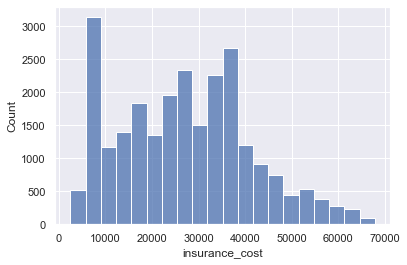

In [135]:
sns.histplot(healthcare["insurance_cost"],bins=20);

In [136]:
display(healthcare.corrwith(healthcare.insurance_cost))

daily_avg_steps     -0.007220
age                  0.005195
avg_glucose_level   -0.005007
bmi                  0.011935
weight               0.970357
fat_percentage      -0.008486
insurance_cost       1.000000
height               0.454553
dtype: float64

-------------------------------------------------------------------------------------------------------------------------------

In [137]:
## Converting the other 'object' type variables as dummy variables

df=healthcare.copy()
df = pd.get_dummies(df,drop_first=True)
df.head()

daily_avg_steps  age  avg_glucose_level   bmi  weight  \
applicant_id                                                          
5000                   4866.0   28                 97  31.2      67   
5001                   6411.0   50                212  34.2      58   
5002                   4509.0   68                166  40.4      73   
5003                   6214.0   51                109  22.9      71   
5004                   4938.0   44                118  26.5      74   

              fat_percentage  insurance_cost    height  \
applicant_id                                             
5000                      25           20978  1.465413   
5001                      27            6170  1.302270   
5002                      32           28382  1.344221   
5003                      37           27148  1.760806   
5004                      34           29616  1.671063   

              years_of_insurance_with_us_1  years_of_insurance_with_us_2  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     1                             0   
5003                                     0                             0   
5004                                     0                             0   

              years_of_insurance_with_us_3  years_of_insurance_with_us_4  \
applicant_id                                                               
5000                                     1                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     0                             0   
5004                                     1                             0   

              years_of_insurance_with_us_5  years_of_insurance_with_us_6  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     0                             0   
5004                                     0                             0   

              years_of_insurance_with_us_7  years_of_insurance_with_us_8  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     1                             0   
5004                                     0                             0   

              regular_checkup_last_year_1  regular_checkup_last_year_2  \
applicant_id                                                             
5000                                    1                            0   
5001                                    0                            0   
5002                                    0                            0   
5003                                    0                            0   
5004                                    1                            0   

              regular_checkup_last_year_3  regular_checkup_last_year_4  \
applicant_id                                                             
5000                                    0                            0   
5001                                    0                            0   
5002                                    0                            0   
5003                                    0                            1   
5004          

In [138]:
df.shape

(25000, 70)

Extract the target column into separate vectors for training set and test set

In [139]:
df.columns

Index(['daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight',
       'fat_percentage', 'insurance_cost', 'height',
       'years_of_insurance_with_us_1', 'years_of_insurance_with_us_2',
       'years_of_insurance_with_us_3', 'years_of_insurance_with_us_4',
       'years_of_insurance_with_us_5', 'years_of_insurance_with_us_6',
       'years_of_insurance_with_us_7', 'years_of_insurance_with_us_8',
       'regular_checkup_last_year_1', 'regular_checkup_last_year_2',
       'regular_checkup_last_year_3', 'regular_checkup_last_year_4',
       'regular_checkup_last_year_5', 'adventure_sports_Y',
       'visited_doctor_last_1_year_1', 'visited_doctor_last_1_year_2',
       'visited_doctor_last_1_year_3', 'visited_doctor_last_1_year_4',
       'visited_doctor_last_1_year_5', 'visited_doctor_last_1_year_6',
       'visited_doctor_last_1_year_7', 'visited_doctor_last_1_year_8',
       'visited_doctor_last_1_year_9', 'visited_doctor_last_1_year_10',
       'visited_doctor_last_1_year_12'

# Scaling the Data

In [140]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [141]:
from sklearn.preprocessing import StandardScaler
df_copy = df.copy()

tempDsteps = df_copy.daily_avg_steps
tempDsteps = tempDsteps.values.reshape(-1,1)
df_copy['daily_avg_steps'] = StandardScaler().fit_transform(tempDsteps)

tempAge = df_copy.age
tempAge = tempAge.values.reshape(-1,1)
df_copy['age'] = StandardScaler().fit_transform(tempAge)

tempGlucose = df_copy.avg_glucose_level
tempGlucose = tempGlucose.values.reshape(-1,1)
df_copy['avg_glucose_level'] = StandardScaler().fit_transform(tempGlucose)

tempBmi = df_copy.bmi
tempBmi = tempBmi.values.reshape(-1,1)
df_copy['bmi'] = StandardScaler().fit_transform(tempBmi)

tempWeight = df_copy.weight
tempWeight = tempWeight.values.reshape(-1,1)
df_copy['weight'] = StandardScaler().fit_transform(tempWeight)

tempHeight = df_copy.height
tempHeight = tempHeight.values.reshape(-1,1)
df_copy['height'] = StandardScaler().fit_transform(tempHeight)

tempFatper = df_copy.fat_percentage
tempFatper = tempFatper.values.reshape(-1,1)
df_copy['fat_percentage'] = StandardScaler().fit_transform(tempFatper)

tempCost = df_copy.insurance_cost
tempCost = tempCost.values.reshape(-1,1)
df_copy['insurance_cost'] = StandardScaler().fit_transform(tempCost)

df_copy.head()

daily_avg_steps       age  avg_glucose_level       bmi  \
applicant_id                                                           
5000                -0.333160 -1.050360          -1.124370 -0.002926   
5001                 1.260326  0.315492           0.708929  0.411175   
5002                -0.701364  1.433007          -0.024391  1.266985   
5003                 1.057144  0.377576          -0.933069 -1.148607   
5004                -0.258901 -0.057013          -0.789594 -0.651685   

                weight  fat_percentage  insurance_cost    height  \
applicant_id                                                       
5000         -0.494422       -0.441634       -0.430722 -0.358065   
5001         -1.459569       -0.209944       -1.464554 -1.147110   
5002          0.149010        0.369282        0.086194 -0.944211   
5003         -0.065467        0.948508        0.000041  1.070604   
5004          0.256249        0.600972        0.172347  0.636564   

              years_of_insurance_with_us_1  years_of_insurance_with_us_2  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     1                             0   
5003                                     0                             0   
5004                                     0                             0   

              years_of_insurance_with_us_3  years_of_insurance_with_us_4  \
applicant_id                                                               
5000                                     1                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     0                             0   
5004                                     1                             0   

              years_of_insurance_with_us_5  years_of_insurance_with_us_6  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     0                             0   
5004                                     0                             0   

              years_of_insurance_with_us_7  years_of_insurance_with_us_8  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     1                             0   
5004                                     0                             0   

              regular_checkup_last_year_1  regular_checkup_last_year_2  \
applicant_id                                                             
5000                                    1                            0   
5001                                    0                            0   
5002                                    0                            0   
5003                                    0                            0   
5004                                    1                            0   

              regular_checkup_last_year_3  regular_checkup_last_year_4  \
applicant_id                                                             
5000                                    0                            0   
5001                                    0                            0   
5002                                    0                            0   
5003       

# Creating Clusters using KMeans

In [142]:
#passing the KMeans function through a loop to automate the process of finding the no. of cluster manually calculating the 'inertia'.
#The 'inertia' gives us the Within Sum of Squares (WSS) for the number of clusters defined in the KMeans function inside the 'sklearn' library.

#Let us define an empty list to being the process of automating the calculation of 'inertia'.
from sklearn.cluster import KMeans 

wss =[] 
for i in range(2,11): #we are mentioning the range which the value of 'i' should take
    KM = KMeans(n_clusters=i) #we are defining the number of clusters which is the same as 'i'
    KM.fit(df_copy) #we are applying the 'fit' function to form the required number of clusters in the dataset
    wss.append(KM.inertia_) # we are adding all the values of 'inertia' into the empty list called wss

#In short, we are calculating the value of 'inertia' in every step and storing the same in 'wss'

In [143]:
# The below code snippet is used to print the WSS values. We have passed it through a loop to make understand the values
# of WSS better.

for i in range(2,11):
    print('The WSS value for',i,'clusters is',wss[i-2])

The WSS value for 2 clusters is 326326.06556721404
The WSS value for 3 clusters is 308991.77643054014
The WSS value for 4 clusters is 298726.9523794954
The WSS value for 5 clusters is 290899.8205930429
The WSS value for 6 clusters is 284622.1491535108
The WSS value for 7 clusters is 279126.04013069335
The WSS value for 8 clusters is 274868.48382279405
The WSS value for 9 clusters is 270447.5169824115
The WSS value for 10 clusters is 266626.23811265035


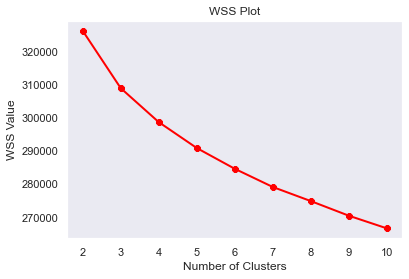

In [144]:
plt.plot(range(2,11), wss,linewidth=2, color='red', marker="8")
plt.grid()
plt.title('WSS Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS Value')
plt.show()

The ideal 'WSS' plot has to have a sharp elbow like structure. The number of clusters corresponding to that elbow-like graph is considered to be the most optimum.

Having said that, here we will go for 4 clusters.

In [145]:
#Let us now store the values of the clusters into a variable and we will attach the particular variable to the data set.
k_means = KMeans(n_clusters = 3)
k_means.fit(df_copy)
labels = k_means.labels_
labels

array([1, 1, 2, ..., 2, 0, 1])

In [146]:
df["Clus_kmeans"] = labels
df.head()

daily_avg_steps  age  avg_glucose_level   bmi  weight  \
applicant_id                                                          
5000                   4866.0   28                 97  31.2      67   
5001                   6411.0   50                212  34.2      58   
5002                   4509.0   68                166  40.4      73   
5003                   6214.0   51                109  22.9      71   
5004                   4938.0   44                118  26.5      74   

              fat_percentage  insurance_cost    height  \
applicant_id                                             
5000                      25           20978  1.465413   
5001                      27            6170  1.302270   
5002                      32           28382  1.344221   
5003                      37           27148  1.760806   
5004                      34           29616  1.671063   

              years_of_insurance_with_us_1  years_of_insurance_with_us_2  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     1                             0   
5003                                     0                             0   
5004                                     0                             0   

              years_of_insurance_with_us_3  years_of_insurance_with_us_4  \
applicant_id                                                               
5000                                     1                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     0                             0   
5004                                     1                             0   

              years_of_insurance_with_us_5  years_of_insurance_with_us_6  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     0                             0   
5004                                     0                             0   

              years_of_insurance_with_us_7  years_of_insurance_with_us_8  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     1                             0   
5004                                     0                             0   

              regular_checkup_last_year_1  regular_checkup_last_year_2  \
applicant_id                                                             
5000                                    1                            0   
5001                                    0                            0   
5002                                    0                            0   
5003                                    0                            0   
5004                                    1                            0   

              regular_checkup_last_year_3  regular_checkup_last_year_4  \
applicant_id                                                             
5000                                    0                            0   
5001                                    0                            0   
5002                                    0                            0   
5003                                    0                            1   
5004          

In [147]:
df_clust = df.groupby('Clus_kmeans').mean()
df_clust = df_clust.reset_index()
round(df_clust,0)

Clus_kmeans  daily_avg_steps   age  avg_glucose_level   bmi  weight  \
0            0           5192.0  46.0              171.0  25.0    78.0   
1            1           5186.0  45.0              169.0  31.0    62.0   
2            2           5190.0  44.0              162.0  38.0    77.0   

   fat_percentage  insurance_cost  height  years_of_insurance_with_us_1  \
0            29.0         36669.0     2.0                           0.0   
1            29.0         13062.0     1.0                           0.0   
2            29.0         35259.0     1.0                           0.0   

   years_of_insurance_with_us_2  years_of_insurance_with_us_3  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   years_of_insurance_with_us_4  years_of_insurance_with_us_5  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   years_of_insurance_with_us_6  years_of_insurance_with_us_7  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   years_of_insurance_with_us_8  regular_checkup_last_year_1  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   

   regular_checkup_last_year_2  regular_checkup_last_year_3  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   

   regular_checkup_last_year_4  regular_checkup_last_year_5  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   

   adventure_sports_Y  visited_doctor_last_1_year_1  \
0                 0.0                           0.0   
1                 0.0                           0.0   
2                 0.0                           0.0   

   visited_doctor_last_1_year_2  visited_doctor_last_1_year_3  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   visited_doctor_last_1_year_4  visited_doctor_last_1_year_5  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   visited_doctor_last_1_year_6  visited_doctor_last_1_year_7  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   visited_doctor_last_1_year_8  visited_doctor_last_1_year_9  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   visited_doctor_last_1_year_10  visited_doctor_last_1_year_12  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   

   heart_decs_history_Y  other_major_decs_history_Y  Gender_Male  \
0                   0.0                         0.0          0.0   
1                   0.0                         0.0          1.0   
2                   0.0                         0.0          1.0   

   covered_by_any_other_company_Y  weight_change_in_

In [148]:
cluster_freq = df['Clus_kmeans'].value_counts().sort_index()
cluster_freq

0    8065
1    9648
2    7287
Name: Clus_kmeans, dtype: int64

In [149]:
df_clust['Frequency'] = cluster_freq.values
round(df_clust,0)

Clus_kmeans  daily_avg_steps   age  avg_glucose_level   bmi  weight  \
0            0           5192.0  46.0              171.0  25.0    78.0   
1            1           5186.0  45.0              169.0  31.0    62.0   
2            2           5190.0  44.0              162.0  38.0    77.0   

   fat_percentage  insurance_cost  height  years_of_insurance_with_us_1  \
0            29.0         36669.0     2.0                           0.0   
1            29.0         13062.0     1.0                           0.0   
2            29.0         35259.0     1.0                           0.0   

   years_of_insurance_with_us_2  years_of_insurance_with_us_3  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   years_of_insurance_with_us_4  years_of_insurance_with_us_5  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   years_of_insurance_with_us_6  years_of_insurance_with_us_7  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   years_of_insurance_with_us_8  regular_checkup_last_year_1  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   

   regular_checkup_last_year_2  regular_checkup_last_year_3  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   

   regular_checkup_last_year_4  regular_checkup_last_year_5  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   

   adventure_sports_Y  visited_doctor_last_1_year_1  \
0                 0.0                           0.0   
1                 0.0                           0.0   
2                 0.0                           0.0   

   visited_doctor_last_1_year_2  visited_doctor_last_1_year_3  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   visited_doctor_last_1_year_4  visited_doctor_last_1_year_5  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   visited_doctor_last_1_year_6  visited_doctor_last_1_year_7  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   visited_doctor_last_1_year_8  visited_doctor_last_1_year_9  \
0                           0.0                           0.0   
1                           0.0                           0.0   
2                           0.0                           0.0   

   visited_doctor_last_1_year_10  visited_doctor_last_1_year_12  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   

   heart_decs_history_Y  other_major_decs_history_Y  Gender_Male  \
0                   0.0                         0.0          0.0   
1                   0.0                         0.0          1.0   
2                   0.0                         0.0          1.0   

   covered_by_any_other_company_Y  weight_change_in_

Cluster 0: Medium age people, quite a good height and high insurance cost agmong other clusters.

Cluster 1: Medium age people, medium height and low insurance cost agmong other clusters.

Cluster 2: Medium age people, medium height and high insurance cost too.

### Split data into training and test set

In [150]:
df.drop("Clus_kmeans",axis=1, inplace=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 5000 to 29999
Data columns (total 70 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   daily_avg_steps                   25000 non-null  float64
 1   age                               25000 non-null  int64  
 2   avg_glucose_level                 25000 non-null  int64  
 3   bmi                               25000 non-null  float64
 4   weight                            25000 non-null  int64  
 5   fat_percentage                    25000 non-null  int64  
 6   insurance_cost                    25000 non-null  int64  
 7   height                            25000 non-null  float64
 8   years_of_insurance_with_us_1      25000 non-null  uint8  
 9   years_of_insurance_with_us_2      25000 non-null  uint8  
 10  years_of_insurance_with_us_3      25000 non-null  uint8  
 11  years_of_insurance_with_us_4      25000 non-null  uint8  
 12  y

In [152]:
X = df_copy.drop("insurance_cost", axis=1)

y = df_copy.pop("insurance_cost")

X.head()

daily_avg_steps       age  avg_glucose_level       bmi  \
applicant_id                                                           
5000                -0.333160 -1.050360          -1.124370 -0.002926   
5001                 1.260326  0.315492           0.708929  0.411175   
5002                -0.701364  1.433007          -0.024391  1.266985   
5003                 1.057144  0.377576          -0.933069 -1.148607   
5004                -0.258901 -0.057013          -0.789594 -0.651685   

                weight  fat_percentage    height  \
applicant_id                                       
5000         -0.494422       -0.441634 -0.358065   
5001         -1.459569       -0.209944 -1.147110   
5002          0.149010        0.369282 -0.944211   
5003         -0.065467        0.948508  1.070604   
5004          0.256249        0.600972  0.636564   

              years_of_insurance_with_us_1  years_of_insurance_with_us_2  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     1                             0   
5003                                     0                             0   
5004                                     0                             0   

              years_of_insurance_with_us_3  years_of_insurance_with_us_4  \
applicant_id                                                               
5000                                     1                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     0                             0   
5004                                     1                             0   

              years_of_insurance_with_us_5  years_of_insurance_with_us_6  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     0                             0   
5004                                     0                             0   

              years_of_insurance_with_us_7  years_of_insurance_with_us_8  \
applicant_id                                                               
5000                                     0                             0   
5001                                     0                             0   
5002                                     0                             0   
5003                                     1                             0   
5004                                     0                             0   

              regular_checkup_last_year_1  regular_checkup_last_year_2  \
applicant_id                                                             
5000                                    1                            0   
5001                                    0                            0   
5002                                    0                            0   
5003                                    0                            0   
5004                                    1                            0   

              regular_checkup_last_year_3  regular_checkup_last_year_4  \
applicant_id                                                             
5000                                    0                            0   
5001                                    0                            0   
5002                                    0                            0   
5003                                    0                            1   
5004                                    0        

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.20, random_state=1)

#Check the dimensions of the training and test data
display(X_train.shape)
display(X_val.shape)
display(y_train.shape)
display(y_val.shape)

(20000, 69)

(5000, 69)

(20000,)

(5000,)

In [154]:
# # data normalization with sklearn
# from sklearn.preprocessing import MinMaxScaler

# # define min max scaler

# #copy of dataset
# X_train_sc = X_train.copy()
# X_val_sc = X_val.copy()

# #numeric column which need to be Normalized
# num_cols=['years_of_insurance_with_us','regular_checkup_last_year','visited_doctor_last_1_year','weight_change_in_last_one_year','daily_avg_steps','age','avg_glucose_level','bmi','weight','fat_percentage']
# # transform data

# for i in num_cols:
    
#     #fit on training data column
#     scale = MinMaxScaler().fit(X_train_sc[[i]])
    
#     X_train_sc[i]= scale.fit_transform(X_train_sc[[i]])
#     X_val_sc[i] = scale.transform(X_val[[i]])




# Building Base-Line Models with different Regression Algothrims

In [155]:
# 1. Linear Regression

In [156]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
print('Model has been trained successfully')
pred_lr_train = model_lr.predict(X_train)
pred_lr_val = model_lr.predict(X_val)

lr_train_score = model_lr.score(X_train, y_train)
print("Model Score/Performance on Training data",lr_train_score)

lr_val_score = model_lr.score(X_val, y_val)
print("Model Score/Performance on Validation data",lr_val_score)

rmse_lr_train = mean_squared_error(y_train, pred_lr_train, squared=False)
print("Model RMSE score on train data",rmse_lr_train)

rmse_lr_val = mean_squared_error(y_val, pred_lr_val, squared=False)
print("Model RMSE score on Validation data",rmse_lr_val)

Model has been trained successfully
Model Score/Performance on Training data 0.9497608911732983
Model Score/Performance on Validation data 0.9499358403660487
Model RMSE score on train data 0.2243771729909217
Model RMSE score on Validation data 0.2227875453668213


--------------------------------------------------------------------------------------------------------------------------

In [157]:
# 2. Decision Tree Regression

In [158]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
print('Model has been trained successfully')
pred_dt_train = model_dt.predict(X_train)
pred_dt_val = model_dt.predict(X_val)

dt_train_score = model_dt.score(X_train, y_train)
print("Model Score/Performance on Training data",dt_train_score)

dt_val_score = model_dt.score(X_val, y_val)
print("Model Score/Performance on Validation data",dt_val_score)

rmse_dt_train = mean_squared_error(y_train, pred_dt_train, squared=False)
rmse_dt_val = mean_squared_error(y_val, pred_dt_val, squared=False)
print("Model RMSE score on train data",rmse_dt_train)
print("Model RMSE score on Validation data",rmse_dt_val)

Model has been trained successfully
Model Score/Performance on Training data 1.0
Model Score/Performance on Validation data 0.9088480202709952
Model RMSE score on train data 3.065043829332054e-17
Model RMSE score on Validation data 0.30061489542365427


--------------------------------------------------------------------------------------------------------------------------

In [159]:
# 3. Lasso

In [160]:
model_la = Lasso()
model_la.fit(X_train, y_train)
pred_la_train = model_la.predict(X_train)
pred_la_val = model_la.predict(X_val)

la_train_score = model_la.score(X_train, y_train)
print("Model Score/Performance on Training data",la_train_score)

la_val_score = model_la.score(X_val, y_val)
print("Model Score/Performance on Validation data",la_val_score)

rmse_la_train = mean_squared_error(y_train, pred_la_train, squared=False)
print("Model RMSE score on train data",rmse_la_train)

rmse_la_val = mean_squared_error(y_val, pred_la_val, squared=False)
print("Model RMSE score on Validation data",rmse_la_val)

Model Score/Performance on Training data 0.0
Model Score/Performance on Validation data -0.0001843014510978236
Model RMSE score on train data 1.0010544680644224
Model RMSE score on Validation data 0.9957893108822026


--------------------------------------------------------------------------------------------------------------------------

In [161]:
# 4. Ridge

In [162]:
model_rd = Ridge()
model_rd.fit(X_train, y_train)
pred_rd_train = model_rd.predict(X_train)
pred_rd_val = model_rd.predict(X_val)

rd_train_score = model_rd.score(X_train, y_train)
print("Model Score/Performance on Training data",rd_train_score)

rd_val_score = model_rd.score(X_val, y_val)
print("Model Score/Performance on Validation data",rd_val_score)

rmse_rd_train = mean_squared_error(y_train, pred_rd_train, squared=False)
print("Model RMSE score on train data",rmse_rd_train)

rmse_rd_val = mean_squared_error(y_val, pred_rd_val, squared=False)
print("Model RMSE score on Validation data",rmse_rd_val)

Model Score/Performance on Training data 0.9497565979995903
Model Score/Performance on Validation data 0.9499395248391166
Model RMSE score on train data 0.22438675984092446
Model RMSE score on Validation data 0.2227793471885235


--------------------------------------------------------------------------------------------------------------------------

In [163]:
# 5. Random Forest 

In [164]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf_train = model_rf.predict(X_train)
pred_rf_val = model_rf.predict(X_val)

rf_train_score = model_rf.score(X_train, y_train)
print("Model Score/Performance on Training data",rf_train_score)

rf_val_score = model_rf.score(X_val, y_val)
print("Model Score/Performance on Validation data",rf_val_score)

rmse_rf_train = mean_squared_error(y_train, pred_rf_train, squared=False)
print("Model RMSE score on train data",rmse_rf_train)

rmse_rf_val = mean_squared_error(y_val, pred_rf_val, squared=False)
print("Model RMSE score on Validation data",rmse_rf_val)

Model Score/Performance on Training data 0.99321739870284
Model Score/Performance on Validation data 0.9512855926867115
Model RMSE score on train data 0.08244339216503178
Model RMSE score on Validation data 0.21976379938266713


--------------------------------------------------------------------------------------------------------------------------

In [165]:
# 6. AdaBoost Regressor

In [166]:
model_ada = AdaBoostRegressor()
model_ada.fit(X_train, y_train)
pred_ada_train = model_ada.predict(X_train)
pred_ada_val = model_ada.predict(X_val)

ada_train_score = model_ada.score(X_train, y_train)
print("Model Score/Performance on Training data",ada_train_score)

ada_val_score = model_ada.score(X_val, y_val)
print("Model Score/Performance on Validation data",ada_val_score)

rmse_ada_train = mean_squared_error(y_train, pred_ada_train, squared=False)
print("Model RMSE score on train data",rmse_ada_train)

rmse_ada_val = mean_squared_error(y_val, pred_ada_val, squared=False)
print("Model RMSE score on Validation data",rmse_ada_val)

Model Score/Performance on Training data 0.9463806594440484
Model Score/Performance on Validation data 0.9470644559982955
Model RMSE score on train data 0.23180267457463716
Model RMSE score on Validation data 0.22908736319900877


--------------------------------------------------------------------------------------------------------------------------

In [167]:
# 7. Gradient Boosting

In [168]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)
pred_gb_train = model_gb.predict(X_train)
pred_gb_val = model_gb.predict(X_val)

gb_train_score = model_gb.score(X_train, y_train)
print("Model Score/Performance on Training data",gb_train_score)

gb_val_score = model_gb.score(X_val, y_val)
print("Model Score/Performance on Validation data",gb_val_score)

rmse_gb_train = mean_squared_error(y_train, pred_gb_train, squared=False)
print("Model RMSE score on train data",rmse_gb_train)

rmse_gb_val = mean_squared_error(y_val, pred_gb_val, squared=False)
print("Model RMSE score on Validation data",rmse_gb_val)

Model Score/Performance on Training data 0.9558407770995895
Model Score/Performance on Validation data 0.9547886965625483
Model RMSE score on train data 0.21036254652807104
Model RMSE score on Validation data 0.21171467256628684


-------------------------------------------------------------------------------------------------------------------------------

In [169]:
# 8. XGBRegressor

In [170]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb_train = model_xgb.predict(X_train)
pred_xgb_val = model_xgb.predict(X_val)

xgb_train_score = model_xgb.score(X_train, y_train)
print("Model Score/Performance on Training data",xgb_train_score)

xgb_val_score = model_xgb.score(X_val, y_val)
print("Model Score/Performance on Validation data",xgb_val_score)

rmse_xgb_train = mean_squared_error(y_train, pred_xgb_train, squared=False)
print("Model RMSE score on train data",rmse_xgb_train)

rmse_xgb_val = mean_squared_error(y_val, pred_xgb_val, squared=False)
print("Model RMSE score on Validation data",rmse_xgb_val)

Model Score/Performance on Training data 0.9736964682356923
Model Score/Performance on Validation data 0.9520625920025739
Model RMSE score on train data 0.16235465339723054
Model RMSE score on Validation data 0.21800412795349453


---------------------------------------------------------------------------------------------------------------------------

In [171]:
# 9. MLP Regressor

In [172]:
model_mlp = MLPRegressor()
model_mlp.fit(X_train, y_train)
pred_mlp_train = model_mlp.predict(X_train)
pred_mlp_val = model_mlp.predict(X_val)

mlp_train_score = model_mlp.score(X_train, y_train)
print("Model Score/Performance on Training data",mlp_train_score)

mlp_val_score = model_mlp.score(X_val, y_val)
print("Model Score/Performance on Validation data",mlp_val_score)

rmse_mlp_train = mean_squared_error(y_train, pred_mlp_train, squared=False)
print("Model RMSE score on train data",rmse_mlp_train)

rmse_mlp_val = mean_squared_error(y_val, pred_mlp_val, squared=False)
print("Model RMSE score on Validation data",rmse_mlp_val)

Model Score/Performance on Training data 0.9658334382214389
Model Score/Performance on Validation data 0.9393911254179244
Model RMSE score on train data 0.18503690136022463
Model RMSE score on Validation data 0.24512948521758532


In [173]:
# 10. Bagging

In [174]:
from sklearn.ensemble import BaggingRegressor
model_bag = BaggingRegressor()
model_bag.fit(X_train, y_train)
pred_bag_train = model_bag.predict(X_train)
pred_bag_val = model_bag.predict(X_val)

bag_train_score = model_bag.score(X_train, y_train)
print("Model Score/Performance on Training data",bag_train_score)

bag_val_score = model_bag.score(X_val, y_val)
print("Model Score/Performance on Validation data",bag_val_score)

rmse_bag_train = mean_squared_error(y_train, pred_bag_train, squared=False)
print("Model RMSE score on train data",rmse_bag_train)

rmse_bag_val = mean_squared_error(y_val, pred_bag_val, squared=False)
print("Model RMSE score on Validation data",rmse_bag_val)

Model Score/Performance on Training data 0.9907034322476543
Model Score/Performance on Validation data 0.946776209754036
Model RMSE score on train data 0.09652038104376467
Model RMSE score on Validation data 0.22971023319305323


In [175]:
train_score=[lr_train_score,dt_train_score,la_train_score,rd_train_score,rf_train_score,ada_train_score,gb_train_score,xgb_train_score,mlp_train_score, bag_train_score]
val_score=[lr_val_score,dt_val_score,la_val_score,rd_val_score,rf_val_score,ada_val_score,gb_val_score,xgb_val_score ,mlp_val_score, bag_val_score]
rmse_train_score=[rmse_lr_train,rmse_dt_train,rmse_la_train,rmse_rd_train,rmse_rf_train,rmse_ada_train,rmse_gb_train,rmse_xgb_train,rmse_mlp_train, rmse_bag_train]
rmse_val_score=[rmse_lr_val,rmse_dt_val,rmse_la_val,rmse_rd_val,rmse_rf_val,rmse_ada_val,rmse_gb_val,rmse_xgb_val,rmse_mlp_val, rmse_bag_val]

col={'Train Error':train_score,'Test Error':val_score,'RMSE Train Error':rmse_train_score,'RMSE Test Error':rmse_val_score}
models=['Linear Regression','Decission Tree','Lasso','Ridge','Random Forest','AdaBoost Regressor','Gradient Boosting','XGB Regressor','MLP Regressor','Bagging']
df_model=pd.DataFrame(data=col,index=models)
df_model

Train Error  Test Error  RMSE Train Error  RMSE Test Error
Linear Regression      0.949761    0.949936      2.243772e-01         0.222788
Decission Tree         1.000000    0.908848      3.065044e-17         0.300615
Lasso                  0.000000   -0.000184      1.001054e+00         0.995789
Ridge                  0.949757    0.949940      2.243868e-01         0.222779
Random Forest          0.993217    0.951286      8.244339e-02         0.219764
AdaBoost Regressor     0.946381    0.947064      2.318027e-01         0.229087
Gradient Boosting      0.955841    0.954789      2.103625e-01         0.211715
XGB Regressor          0.973696    0.952063      1.623547e-01         0.218004
MLP Regressor          0.965833    0.939391      1.850369e-01         0.245129
Bagging                0.990703    0.946776      9.652038e-02         0.229710

In [154]:
# #defining a function to find model score,r2 score for the given dataset
# model=[LinearRegression(),DecisionTreeRegressor(),Lasso(),Ridge(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),XGBRegressor(),MLPRegressor()]

# for m in model:
#     m.fit(X_train,y_train)
#     score=m.score(X_train,y_train)
#     predm=m.predict(X_val)
#     print('Score of',m,'is:',score)
#     print('MAE:',mean_absolute_error(y_val,predm))
#     print('MSE:',mean_squared_error(y_val,predm))
#     print('RMSE:',np.sqrt(mean_squared_error(y_val,predm)))
#     print('R2 score:',r2_score(y_val,predm))
#     print('*'*100)
#     print('\n')  

### With default parameters we can see that how the model is working on our Dataset.

Selecting on RMSE metrics we see that:

Gradient Boosting Model is performing the best among others.

2nd and 3rd best model is Froest Regressor and XGBRegressor

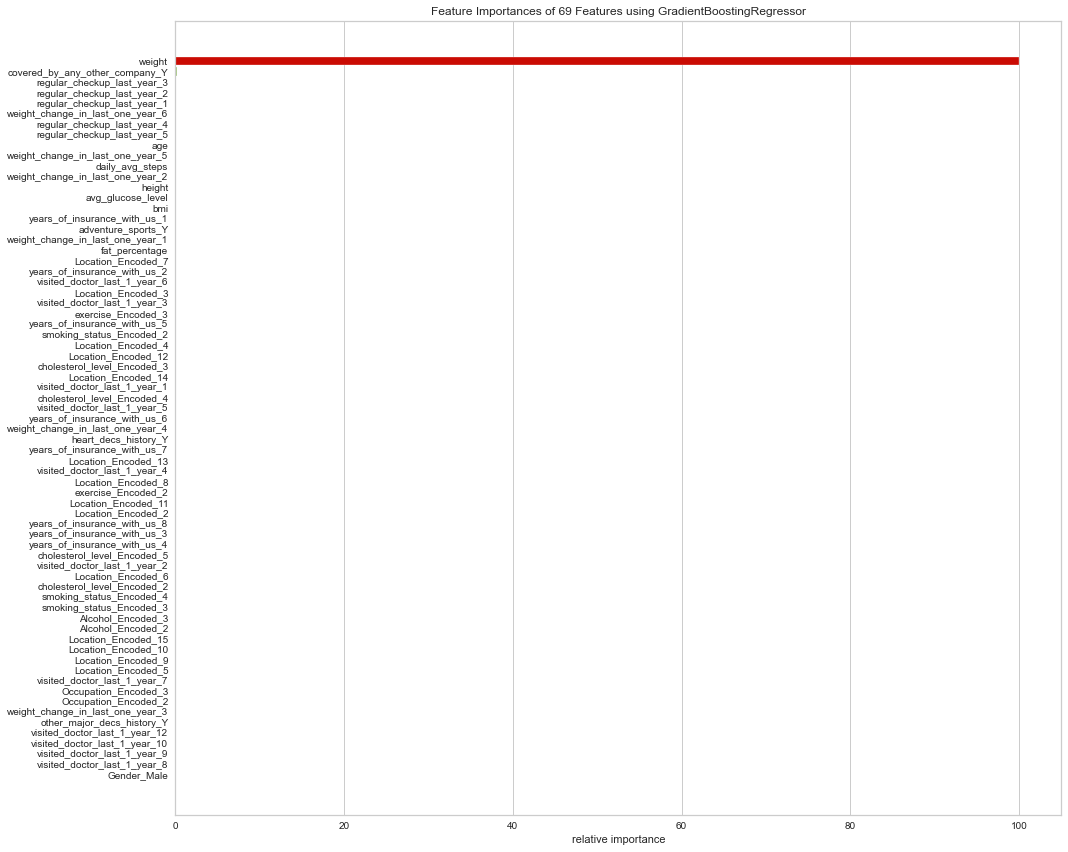

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 69 Features using GradientBoostingRegressor'}, xlabel='relative importance'>,
                   estimator=GradientBoostingRegressor())

In [181]:
# Feature importance
from yellowbrick.model_selection import feature_importances
plt.figure(figsize=(15,12))
feature_importances(model_gb,X_train, y_train)

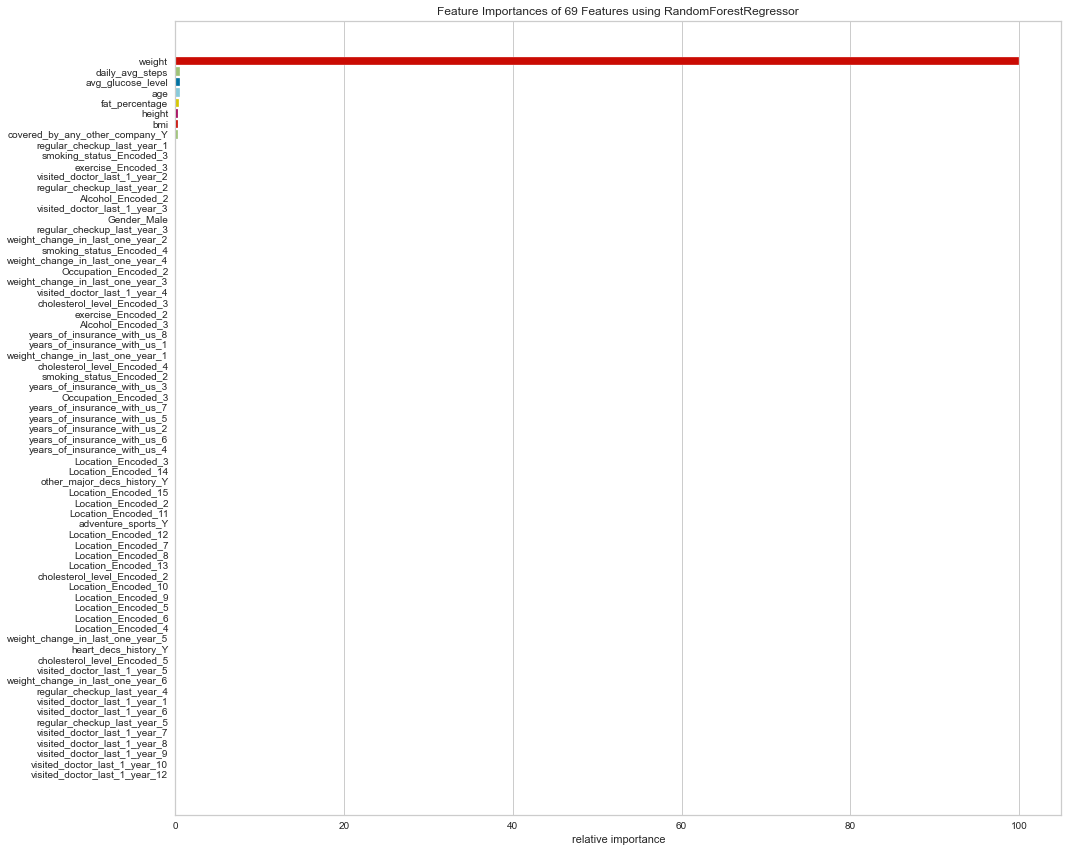

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 69 Features using RandomForestRegressor'}, xlabel='relative importance'>,
                   estimator=RandomForestRegressor())

In [182]:
# Feature importance
from yellowbrick.model_selection import feature_importances
plt.figure(figsize=(15,12))
feature_importances(model_rf,X_train, y_train)

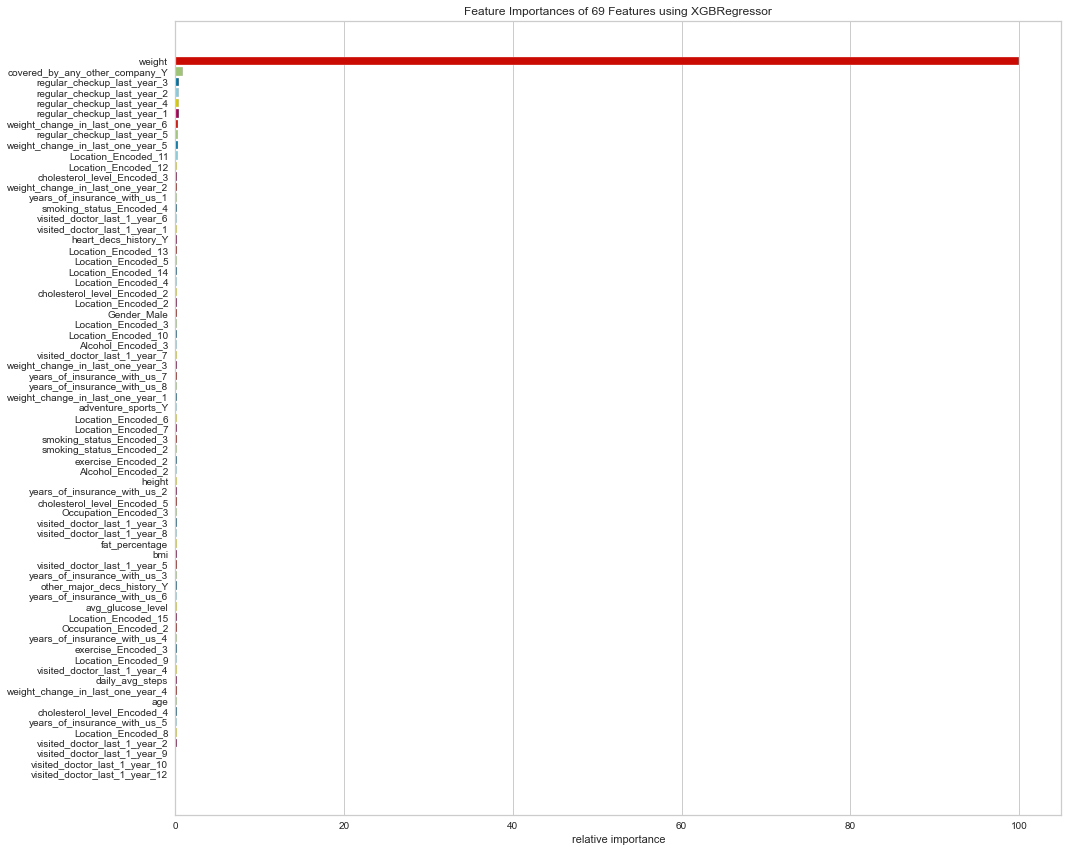

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 69 Features using XGBRegressor'}, xlabel='relative importance'>,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, max_cat_to_onehot=4,
                 

In [183]:
# Feature importance
from yellowbrick.model_selection import feature_importances
plt.figure(figsize=(15,12))
feature_importances(model_xgb,X_train, y_train)

-------------------------------------------------------------------------------------------------------------------------------

## Model 1: Hypertuning-Gradient Boosting Regressor

## Iteration 1

In [184]:
from sklearn.model_selection import GridSearchCV
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='r2',n_jobs=4,cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='r2')

In [185]:
pred_g1_train = gsearch1.predict(X_train)
pred_g1_val = gsearch1.predict(X_val)
g1_train_score = gsearch1.score(X_train, y_train)
print("Model Score/Performance on Training data",g1_train_score)
print('\n')

g1_val_score = gsearch1.score(X_val, y_val)
print("Model Score/Performance on Validation data",g1_val_score)

rmse_g1_train = mean_squared_error(y_train, pred_g1_train, squared=False)
rmse_g1_val = mean_squared_error(y_val, pred_g1_val, squared=False)
print("Model RMSE score on train data",rmse_g1_train)
print("Model RMSE score on Validation data",rmse_g1_val)

Model Score/Performance on Training data 0.9500775628798941


Model Score/Performance on Validation data 0.944460870168051
Model RMSE score on train data 0.22366889783850383
Model RMSE score on Validation data 0.23465346889290442


## Iteration2

In [186]:
param_test2 = {'max_depth':range(8,20,2), 'min_samples_split':range(500,2001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='r2',n_jobs=4,cv=5)
gsearch2.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_features='sqrt',
                                                 n_estimators=60,
                                                 random_state=10,
                                                 subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(8, 20, 2),
                         'min_samples_split': range(500, 2001, 200)},
             scoring='r2')

In [187]:
gsearch2.best_params_

{'max_depth': 12, 'min_samples_split': 500}

In [188]:
pred_g2_train = gsearch2.predict(X_train)
pred_g2_val = gsearch2.predict(X_val)
g2_train_score = gsearch2.score(X_train, y_train)
print("Model Score/Performance on Training data",g2_train_score)
print('\n')

g2_val_score = gsearch2.score(X_val, y_val)
print("Model Score/Performance on Validation data",g2_val_score)

rmse_g2_train = mean_squared_error(y_train, pred_g2_train, squared=False)
rmse_g2_val = mean_squared_error(y_val, pred_g2_val, squared=False)
print("Model RMSE score on train data",rmse_g2_train)
print("Model RMSE score on Validation data",rmse_g2_val)

Model Score/Performance on Training data 0.9490036503823388


Model Score/Performance on Validation data 0.9411838948849441
Model RMSE score on train data 0.22606183747992067
Model RMSE score on Validation data 0.24147689006021608


## Iteration 3

In [189]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='r2',n_jobs=4, cv=5)
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=9,
                                                 max_features='sqrt',
                                                 n_estimators=60,
                                                 random_state=10,
                                                 subsample=0.8),
             n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(1000, 2100, 200)},
             scoring='r2')

In [190]:
gsearch3.best_params_

{'min_samples_leaf': 30, 'min_samples_split': 1000}

In [191]:
pred_g3_train = gsearch3.predict(X_train)
pred_g3_val = gsearch3.predict(X_val)

g3_train_score =gsearch3.score(X_train, y_train)
print("Model Score/Performance on Training data",g3_train_score)

g3_val_score = gsearch3.score(X_val, y_val)
print("Model Score/Performance on Validation data",g3_val_score)

rmse_g3_train = mean_squared_error(y_train, pred_g3_train, squared=False)
print("Model RMSE score on train data",rmse_g3_train)

rmse_g3_val = mean_squared_error(y_val, pred_g3_val, squared=False)
print("Model RMSE score on Validation data",rmse_g3_val)

Model Score/Performance on Training data 0.9402838718916998
Model Score/Performance on Validation data 0.9352911813060941
Model RMSE score on train data 0.24462651533895188
Model RMSE score on Validation data 0.2532848298039167


## Iteration 4

In [192]:
param_test4 = {'max_depth':[2,3,4,5,6,7] }
gsearch4 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.05,n_estimators=500),param_grid=param_test4, cv = 5)
gsearch4.fit(X_train,y_train)
print("Best Parameters:",gsearch4.best_params_)

Best Parameters: {'max_depth': 2}


In [193]:
pred_g4_train = gsearch4.predict(X_train)
pred_g4_val = gsearch4.predict(X_val)
g4_train_score = gsearch4.score(X_train, y_train)
print("Model Score/Performance on Training data",g4_train_score)
print('\n')

g4_val_score = gsearch4.score(X_val, y_val)
print("Model Score/Performance on Validation data",g4_val_score)

rmse_g4_train = mean_squared_error(y_train, pred_g4_train, squared=False)
rmse_g4_val = mean_squared_error(y_val, pred_g4_val, squared=False)
print("Model RMSE score on train data",rmse_g4_train)
print("Model RMSE score on Validation data",rmse_g4_val)

Model Score/Performance on Training data 0.9558748474292167


Model Score/Performance on Validation data 0.9548842510172736
Model RMSE score on train data 0.2102813799700669
Model RMSE score on Validation data 0.2114908238925994


In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [195]:
from scipy.stats import uniform
from scipy.stats import randint as sp_randint

# Iteration 5

In [196]:
param_test5 = {"max_depth":sp_randint(3,7),
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": sp_randint(2,10),
              "min_samples_leaf": sp_randint(1,10),
            'learning_rate':uniform(0.05,0.2),
            'n_estimators':sp_randint(10,70)}

In [197]:
gsearch5 = RandomizedSearchCV(GradientBoostingRegressor(), param_distributions=param_test5,n_iter=100)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_

{'learning_rate': 0.16908163992139907,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 3,
 'n_estimators': 67}

In [198]:
pred_g5_train = gsearch5.predict(X_train)
pred_g5_val = gsearch5.predict(X_val)

g5_train_score = gsearch5.score(X_train, y_train)
print("Model Score/Performance on Training data",g5_train_score)

g5_val_score = gsearch5.score(X_val, y_val)
print("Model Score/Performance on Validation data",g5_val_score)

rmse_g5_train = mean_squared_error(y_train, pred_g5_train, squared=False)
print("Model RMSE score on train data",rmse_g5_train)

rmse_g5_val = mean_squared_error(y_val, pred_g5_val, squared=False)
print("Model RMSE score on Validation data",rmse_g5_val)

Model Score/Performance on Training data 0.9559922303841064
Model Score/Performance on Validation data 0.9548122188130522
Model RMSE score on train data 0.21000149552694405
Model RMSE score on Validation data 0.2116595906166993


In [199]:
train_score=[g1_train_score,g2_train_score,g3_train_score,g4_train_score,g5_train_score]
val_score=[g1_val_score,g2_val_score,g3_val_score,g4_val_score,g5_val_score]
rmse_train_score=[rmse_g1_train,rmse_g2_train,rmse_g3_train,rmse_g4_train,rmse_g5_train]
rmse_val_score=[rmse_g1_val,rmse_g2_val,rmse_g3_val,rmse_g4_val,rmse_g5_val]

col={'Train Error':train_score,'Test Error':val_score,'RMSE Train Error':rmse_train_score,'RMSE Test Error':rmse_val_score}
models=['GB:I1','GB:I2','GB:I3','GB:I4','GB:I5']
df_model_HP_GB=pd.DataFrame(data=col,index=models)
df_model_HP_GB

Train Error  Test Error  RMSE Train Error  RMSE Test Error
GB:I1     0.950078    0.944461          0.223669         0.234653
GB:I2     0.949004    0.941184          0.226062         0.241477
GB:I3     0.940284    0.935291          0.244627         0.253285
GB:I4     0.955875    0.954884          0.210281         0.211491
GB:I5     0.955992    0.954812          0.210001         0.211660

In [225]:
df1_gb = y_val.copy()
df1_gb['predicted_value'] = pred_g5_val
df1_gb['residual']= y_val - df1_gb['predicted_value']
df1_gb['residual'].head()

applicant_id
26492   -0.040537
14488   -0.195864
21933    0.087762
17604    0.244261
13222   -0.240621
Name: insurance_cost, dtype: float64

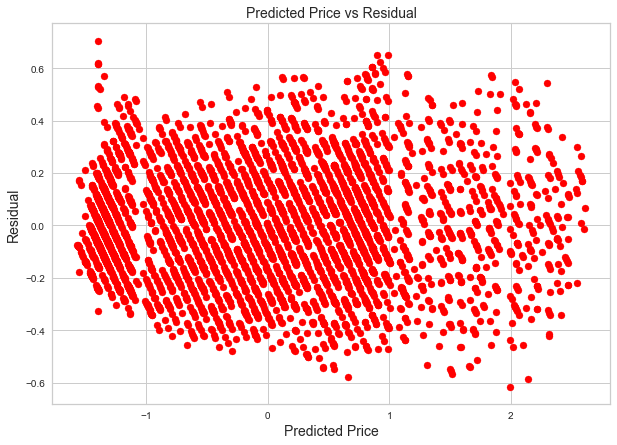

In [226]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(df1_gb['predicted_value'], df1_gb['residual'], color = 'red')
plt.title('Predicted Price vs Residual', fontsize= 14)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Residual', fontsize= 14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='insurance_cost', ylabel='Density'>

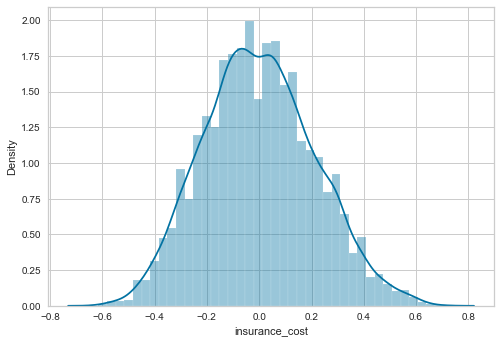

In [227]:
sns.distplot(df1_gb.residual)

In [426]:
df_gb = pd.DataFrame(data={'Predicted_value':pred_g5_val.flatten(),'Actual_Value':y_val.values.flatten()})
df_gb.head(10)

Predicted_value  Actual_Value
0         0.902106      0.861568
1        -1.268690     -1.464554
2        -1.293859     -1.206096
3        -0.158067      0.086194
4         0.757579      0.516958
5         0.669865      0.603110
6        -1.145855     -1.292249
7         0.479175      0.775416
8        -0.214836     -0.430722
9        -0.536445     -0.603028

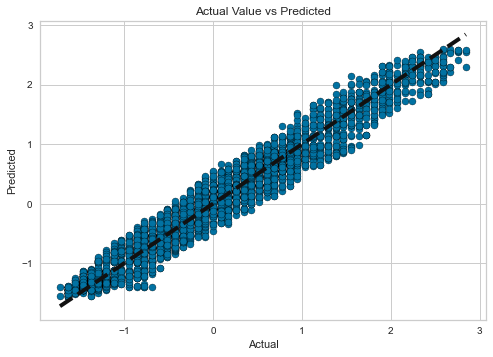

In [229]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_val, pred_g5_val, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Value vs Predicted")
plt.show()

# Model2: Random Forest Regressor-Hyper tuning

In [200]:
# Using GridCVSearch
param_test1 = {"max_depth": [3,5,6,7,8,9],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3,5,7],
              "min_samples_leaf": [1, 3,5,6]}

In [201]:
gsearch1 = GridSearchCV(RandomForestRegressor(), param_grid=param_test1)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [202]:
pred_rf1_train = gsearch1.predict(X_train)
pred_rf1_val = gsearch1.predict(X_val)

rf1_train_score = gsearch1.score(X_train, y_train)
print("Model Score/Performance on Training data",rf1_train_score)

rf1_val_score = gsearch1.score(X_val, y_val)
print("Model Score/Performance on Validation data",rf1_val_score)

rmse_rf1_train = mean_squared_error(y_train, pred_rf1_train, squared=False)
print("Model RMSE score on train data",rmse_rf1_train)

rmse_rf1_val = mean_squared_error(y_val, pred_rf1_val, squared=False)
print("Model RMSE score on Validation data",rmse_rf1_val)

Model Score/Performance on Training data 0.9564378876904618
Model Score/Performance on Validation data 0.9533642230235627
Model RMSE score on train data 0.2089354696045541
Model RMSE score on Validation data 0.21502405694669413


# Iteration 2

In [203]:
# Using RandomizedCV search
param_test2 = {"max_depth": sp_randint(3,9),
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split":sp_randint(2,7),
              "min_samples_leaf": sp_randint(1,6)}

In [204]:
rsearch2 = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_test2,n_iter=100)
rsearch2.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023A044C7670>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023A0319CF10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023A030A2940>})

In [205]:
rsearch2.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [206]:
pred_rf2_train = rsearch2.predict(X_train)
pred_rf2_val = rsearch2.predict(X_val)

rf2_train_score = rsearch2.score(X_train, y_train)
print("Model Score/Performance on Training data",rf2_train_score)

rf2_val_score = rsearch2.score(X_val, y_val)
print("Model Score/Performance on Validation data",rf2_val_score)

rmse_rf2_train = mean_squared_error(y_train, pred_rf2_train, squared=False)
print("Model RMSE score on train data",rmse_rf2_train)

rmse_rf2_val = mean_squared_error(y_val, pred_rf2_val, squared=False)
print("Model RMSE score on Validation data",rmse_rf2_val)

Model Score/Performance on Training data 0.9564340323066096
Model Score/Performance on Validation data 0.9532165533988276
Model RMSE score on train data 0.20894471512285923
Model RMSE score on Validation data 0.21536421881295126


In [207]:
train_score=[rf1_train_score,rf2_train_score]
val_score=[rf1_val_score,rf2_val_score]
rmse_train_score=[rmse_rf1_train,rmse_rf2_train]
rmse_val_score=[rmse_rf1_val,rmse_rf2_val]

col={'Train Error':train_score,'Test Error':val_score,'RMSE Train Error':rmse_train_score,'RMSE Test Error':rmse_val_score}
models=['RF:I1','RF:I2']
df_model_HP_RF=pd.DataFrame(data=col,index=models)
df_model_HP_RF

Train Error  Test Error  RMSE Train Error  RMSE Test Error
RF:I1     0.956438    0.953364          0.208935         0.215024
RF:I2     0.956434    0.953217          0.208945         0.215364

In [220]:
df1_rf = y_val.copy()
df1_rf['predicted_value'] = pred_rf2_val
df1_rf['residual']= y_val - df1_rf['predicted_value']
df1_rf['residual'].head()

applicant_id
26492   -0.043680
14488   -0.236946
21933    0.118607
17604    0.232676
13222   -0.252876
Name: insurance_cost, dtype: float64

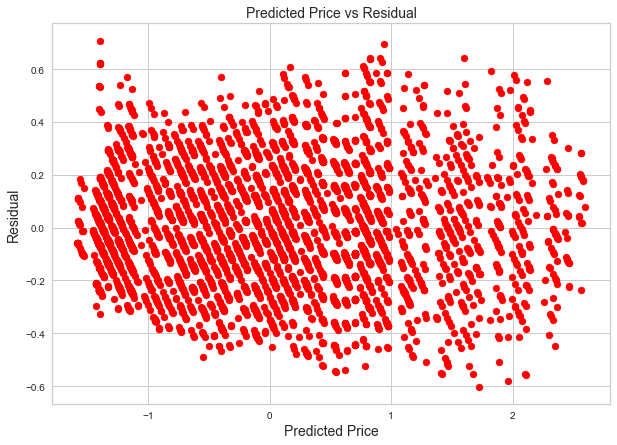

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(df1_rf['predicted_value'], df1_rf['residual'], color = 'red')
plt.title('Predicted Price vs Residual', fontsize= 14)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Residual', fontsize= 14)
plt.grid(True)

<AxesSubplot:xlabel='insurance_cost', ylabel='Density'>

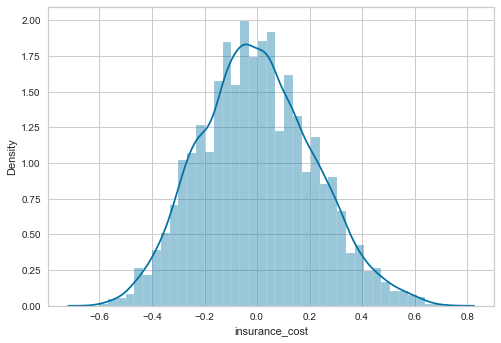

In [222]:
sns.distplot(df1_rf.residual)

In [427]:
df_rf = pd.DataFrame(data={'Predicted_value':pred_rf2_val.flatten(),'Actual_Value':y_val.values.flatten()})
df_rf.head(10)

Predicted_value  Actual_Value
0         0.905248      0.861568
1        -1.227608     -1.464554
2        -1.324704     -1.206096
3        -0.146482      0.086194
4         0.769834      0.516958
5         0.770793      0.603110
6        -1.162143     -1.292249
7         0.569463      0.775416
8        -0.196052     -0.430722
9        -0.577504     -0.603028

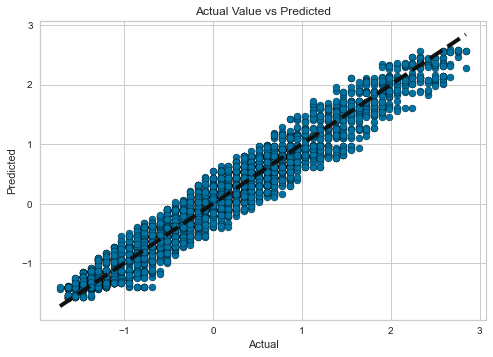

In [224]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_val, pred_rf2_val, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Value vs Predicted")
plt.show()

# Model 3: XGB

# Iteration 1

In [208]:
param_test1 = {"max_depth": [3,4,5,6,7,8],
              "min_child_weight" : [4,5,6,7,8],
            'learning_rate':[0.05,0.1,0.2,0.25,0.8,1],
            'n_estimators': [10,30,50,70,80,100]}
gsearch1 = GridSearchCV(XGBRegressor(), param_grid=param_test1)
gsearch1.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None,

In [209]:
pred_xgb1_train = gsearch1.predict(X_train)
pred_xgb1_val = gsearch1.predict(X_val)

xgb1_train_score = gsearch1.score(X_train, y_train)
print("Model Score/Performance on Training data",xgb1_train_score)

xgb1_val_score = gsearch1.score(X_val, y_val)
print("Model Score/Performance on Validation data",xgb1_val_score)

rmse_xgb1_train = mean_squared_error(y_train, pred_xgb1_train, squared=False)
print("Model RMSE score on train data",rmse_xgb1_train)

rmse_xgb1_val = mean_squared_error(y_val, pred_xgb1_val, squared=False)
print("Model RMSE score on Validation data",rmse_xgb1_val)

Model Score/Performance on Training data 0.9558046878898104
Model Score/Performance on Validation data 0.9547980100090687
Model RMSE score on train data 0.21044848857029133
Model RMSE score on Validation data 0.21169286502384127


## Iteration 2

In [210]:
param_test2 = {"max_depth":sp_randint(3,8),
              "min_child_weight" : sp_randint(4,8),
            'learning_rate':uniform(0.05,1),
            'n_estimators':sp_randint(10,100)}
rsearch2 = GridSearchCV(XGBRegressor(), param_grid=param_test1)
rsearch2.fit(X_train,y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_o...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None,

In [211]:
rsearch2.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 7,
 'n_estimators': 100}

In [212]:
pred_xgb2_train = rsearch2.predict(X_train)
pred_xgb2_val = rsearch2.predict(X_val)

xgb2_train_score = rsearch2.score(X_train, y_train)
print("Model Score/Performance on Training data",xgb2_train_score)

xgb2_val_score = rsearch2.score(X_val, y_val)
print("Model Score/Performance on Validation data",xgb2_val_score)

rmse_xgb2_train = mean_squared_error(y_train, pred_xgb2_train, squared=False)
print("Model RMSE score on train data",rmse_xgb2_train)

rmse_xgb2_val = mean_squared_error(y_val, pred_xgb2_val, squared=False)
print("Model RMSE score on Validation data",rmse_xgb2_val)

Model Score/Performance on Training data 0.9558046878898104
Model Score/Performance on Validation data 0.9547980100090687
Model RMSE score on train data 0.21044848857029133
Model RMSE score on Validation data 0.21169286502384127


In [213]:
train_score=[xgb1_train_score,xgb2_train_score]
val_score=[xgb1_val_score,xgb2_val_score]
rmse_train_score=[rmse_xgb1_train,rmse_xgb2_train]
rmse_val_score=[rmse_xgb1_val,rmse_xgb2_val]

col={'Train Error':train_score,'Test Error':val_score,'RMSE Train Error':rmse_train_score,'RMSE Test Error':rmse_val_score}
models=['XGB:I1','XGB:I2']
df_model_HP_XGB=pd.DataFrame(data=col,index=models)
df_model_HP_XGB

Train Error  Test Error  RMSE Train Error  RMSE Test Error
XGB:I1     0.955805    0.954798          0.210448         0.211693
XGB:I2     0.955805    0.954798          0.210448         0.211693

In [214]:
print(model_xgb.feature_importances_)

[1.3498516e-03 1.3307093e-03 1.4814971e-03 1.5320871e-03 8.7555313e-01
 1.5400317e-03 1.6383097e-03 1.9559709e-03 1.6365268e-03 1.5154139e-03
 1.4170168e-03 1.2822585e-03 1.4974008e-03 1.7253867e-03 1.7220869e-03
 3.1676788e-03 3.6768001e-03 4.1807555e-03 3.2204578e-03 2.7021726e-03
 1.7096774e-03 1.8796894e-03 1.2426861e-03 1.5457473e-03 1.3591157e-03
 1.5213358e-03 1.9143618e-03 1.7368543e-03 1.5418957e-03 3.7551246e-04
 1.8012353e-04 0.0000000e+00 1.8728618e-03 1.5052452e-03 1.7800496e-03
 7.6649715e-03 1.7215454e-03 1.9975274e-03 1.7283921e-03 1.3421193e-03
 2.3940003e-03 2.8394253e-03 1.4437378e-03 1.5604054e-03 1.7984693e-03
 1.7725284e-03 1.8147771e-03 1.8355318e-03 1.6969176e-03 1.6894056e-03
 1.2683284e-03 1.3777369e-03 1.7691461e-03 2.3244785e-03 2.0615859e-03
 1.8653717e-03 1.8291996e-03 1.4548606e-03 1.6444105e-03 1.7407817e-03
 1.6531420e-03 1.6784390e-03 1.9251764e-03 1.6517184e-03 1.3942611e-03
 1.8142585e-03 2.0460752e-03 1.3081038e-03 1.6025287e-03]


In [199]:
from sklearn.feature_selection import SelectFromModel

In [207]:
for index in sorted_idx:
    print([X_train.columns[index], model_gb.feature_importances_[index]]) 

['weight', 0.9954137004607474]
['covered_by_any_other_company_Y', 0.002363290938864214]
['regular_checkup_last_year_3', 0.0004349656265616145]
['regular_checkup_last_year_2', 0.0004261689648825737]
['regular_checkup_last_year_1', 0.0003232031652422569]
['weight_change_in_last_one_year_6', 0.00013870550668481943]
['regular_checkup_last_year_4', 0.00013008448552541977]
['regular_checkup_last_year_5', 9.680283585699289e-05]
['age', 8.144475907127762e-05]
['weight_change_in_last_one_year_5', 7.411483870731614e-05]
['daily_avg_steps', 7.260663300896369e-05]
['weight_change_in_last_one_year_2', 7.1817884548139e-05]
['height', 6.056955384766509e-05]
['avg_glucose_level', 5.591822373394079e-05]
['bmi', 4.705512178346948e-05]
['years_of_insurance_with_us_1', 4.079595162362836e-05]
['adventure_sports_Y', 2.3465975076557572e-05]
['weight_change_in_last_one_year_1', 1.911461678249461e-05]
['fat_percentage', 1.7509372324896982e-05]
['Location_Encoded_7', 1.2570483022457416e-05]
['years_of_insurance

In [215]:
df1_xgb = y_val.copy()
df1_xgb['predicted_value'] = pred_xgb2_val
df1_xgb['residual']= y_val - df1_xgb['predicted_value']
df1_xgb['residual'].head()

applicant_id
26492   -0.039077
14488   -0.193835
21933    0.091593
17604    0.230596
13222   -0.238842
Name: insurance_cost, dtype: float64

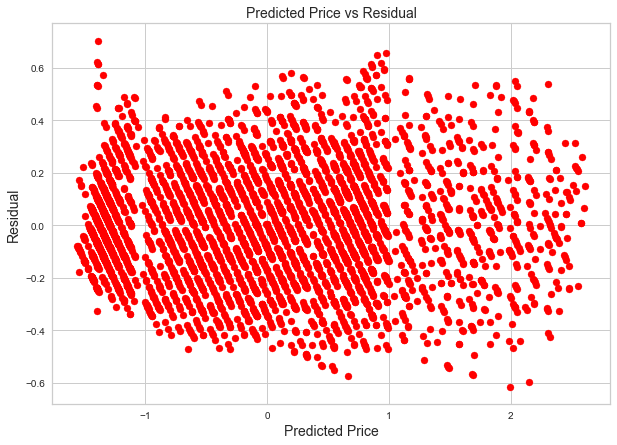

In [216]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(df1_xgb['predicted_value'], df1_xgb['residual'], color = 'red')
plt.title('Predicted Price vs Residual', fontsize= 14)
plt.xlabel('Predicted Price', fontsize = 14)
plt.ylabel('Residual', fontsize= 14)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='insurance_cost', ylabel='Density'>

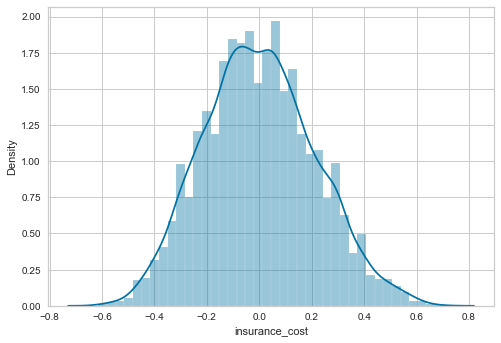

In [217]:
sns.distplot(df1_xgb.residual)

In [428]:
df_xgb = pd.DataFrame(data={'Predicted_value':pred_xgb2_val.flatten(),'Actual_Value':y_val.values.flatten()})
df_xgb.head(10)

Predicted_value  Actual_Value
0         0.900645      0.861568
1        -1.270719     -1.464554
2        -1.297690     -1.206096
3        -0.144402      0.086194
4         0.755799      0.516958
5         0.663955      0.603110
6        -1.151181     -1.292249
7         0.488146      0.775416
8        -0.210795     -0.430722
9        -0.545409     -0.603028

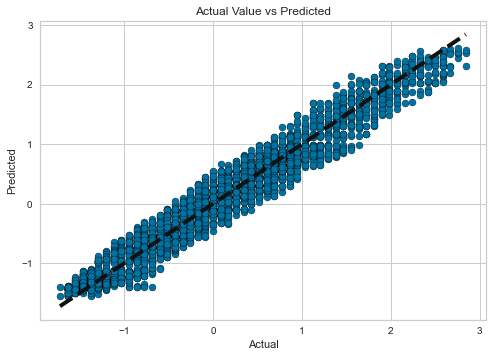

In [219]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_val, pred_xgb2_val, edgecolors=(0, 0, 0))
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual Value vs Predicted")
plt.show()